<a href="https://colab.research.google.com/github/251aditya/Android_Authenticity_Prediction_Aditya/blob/main/ANDROID_AUTHENTICITY_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Classification(Supervised Machine Learning)
##### **Contribution**    - **Aditya Kumar** (Individual)


# **Project Summary -**

This dataset consists of apps needed permissions during installation and run-time. We collect apps from three different sources: google play, third-party apps and malware dataset. This file contains more than 30,000 Android apps. features extracted at the time of installation and execution. One file contains the name of the features and others contain a .apk file corresponding to extracted permissions with respective packages. Apps are collected from Google's play store, hiapk, app china, Android, mumayi , gfan slideme, and pandaapp. These .apk files collected from the last three years continuously contain 81 distinct malware families. But, Here you are only supposed to predict whether the app is benign(0) or malware(1).

# **GitHub Link -**

Link :- https://github.com/251aditya/Android_Authenticity_Prediction_Aditya/tree/main

# **Problem Statement**


The rapid growth of Android applications has led to a significant increase in the risk of malicious apps infiltrating the ecosystem. These malicious apps pose a serious threat to user privacy and security by stealing sensitive data, performing unauthorized actions, and potentially damaging devices. To mitigate this risk, it is imperative to develop a robust machine learning model capable of accurately predicting the authenticity of Android apps.


So we can understand Android application (app) is authentic or not. With the increase in the number of mobile apps, the risk of downloading malicious apps has also increased. Malicious apps can steal sensitive user data, perform unwanted actions, and damage the user's device. Therefore, it is essential to develop a model that can accurately predict the authenticity of Android apps and help users make informed decisions about which apps to download and install on their devices. The challenge is to identify the relevant features that can distinguish between authentic and malicious apps and to train a classification model that can generalize well to new, unseen apps. Additionally, the model should be able to handle the large and dynamic nature of the mobile app ecosystem, where new apps are constantly being developed and released.

Ultimately, the success of this project will contribute to a safer and more secure Android ecosystem, empowering users to navigate the vast app marketplace with confidence.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Evaluation Metrices and Cross Validation Techniques
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss, roc_auc_score, classification_report
from sklearn.metrics import cohen_kappa_score, roc_curve, auc
from sklearn.model_selection import cross_val_score

# Parametric Algorithms
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

# Ensemble Techniques
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import tree

# Non-Parametric Algorithms
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC, LinearSVC
from sklearn.feature_selection import f_classif,mutual_info_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler


import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/CSV_File/ANDRIOD AUTHENTICITY PREDICTION.csv")

### Dataset First View

In [4]:
# Dataset First Look
data.head()

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,...,Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
0,Canada Post Corporation,com.canadapost.android,Business,Canada Post Mobile App gives you access to som...,3.1,77,0.00,"{com.adaffix.pub.ca.android, com.kevinquan.gas...",7.0,1,...,0,1,0,0,0,0,0,1,0,0
1,Word Farm,com.realcasualgames.words,Brain & Puzzle,Speed and strategy combine in this exciting wo...,4.3,199,0.00,"{air.com.zubawing.FastWordLite, com.joybits.do...",3.0,2,...,0,0,0,0,0,0,0,0,0,0
2,Fortunes of War FREE,fortunesofwar.free,Cards & Casino,"Fortunes of War is a fast-paced, easy to learn...",4.1,243,0.00,"{com.kevinquan.condado, hu.monsta.pazaak, net....",1.0,1,...,0,0,0,0,0,0,0,0,0,0
3,Better Keyboard: Avatar Purple,com.cc.betterkeyboard.skins.avatarpurple,Libraries & Demo,Skin for Better Keyboard featuring a glossy fe...,3.6,2589,0.00,{eu.gdumoulin.betterandroid.skins.transparent....,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,Boxing Day,indiaNIC.android.BoxingDay,Lifestyle,Boxing Day by Christopher Jaymes<p>Based on a ...,0.0,0,5.99,NaN,1.0,0,...,0,0,0,0,0,0,0,0,0,1


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print('Rows :', data.shape[0])
print('Columns :', data.shape[1])

Rows : 29999
Columns : 184


### Dataset Information

In [6]:
# Dataset Info
data.iloc[:, :10].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   App                          29998 non-null  object 
 1   Package                      29999 non-null  object 
 2   Category                     29999 non-null  object 
 3   Description                  29996 non-null  object 
 4   Rating                       29999 non-null  float64
 5   Number of ratings            29999 non-null  int64  
 6   Price                        29999 non-null  float64
 7   Related apps                 29244 non-null  object 
 8   Dangerous permissions count  29795 non-null  float64
 9   Safe permissions count       29999 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 2.3+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
duplicate_counts = data.iloc[ : , :10].apply(lambda x: x.duplicated().sum())

# Display the result
print(duplicate_counts)

App                             7175
Package                         6514
Category                       29969
Description                     6446
Rating                         29957
Number of ratings              24687
Price                          29574
Related apps                    6130
Dangerous permissions count    29970
Safe permissions count         29983
dtype: int64


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
data.iloc[ : , :10].isnull().sum()


,0
App,1
Package,0
Category,0
Description,3
Rating,0
Number of ratings,0
Price,0
Related apps,755
Dangerous permissions count,204
Safe permissions count,0


<Axes: >

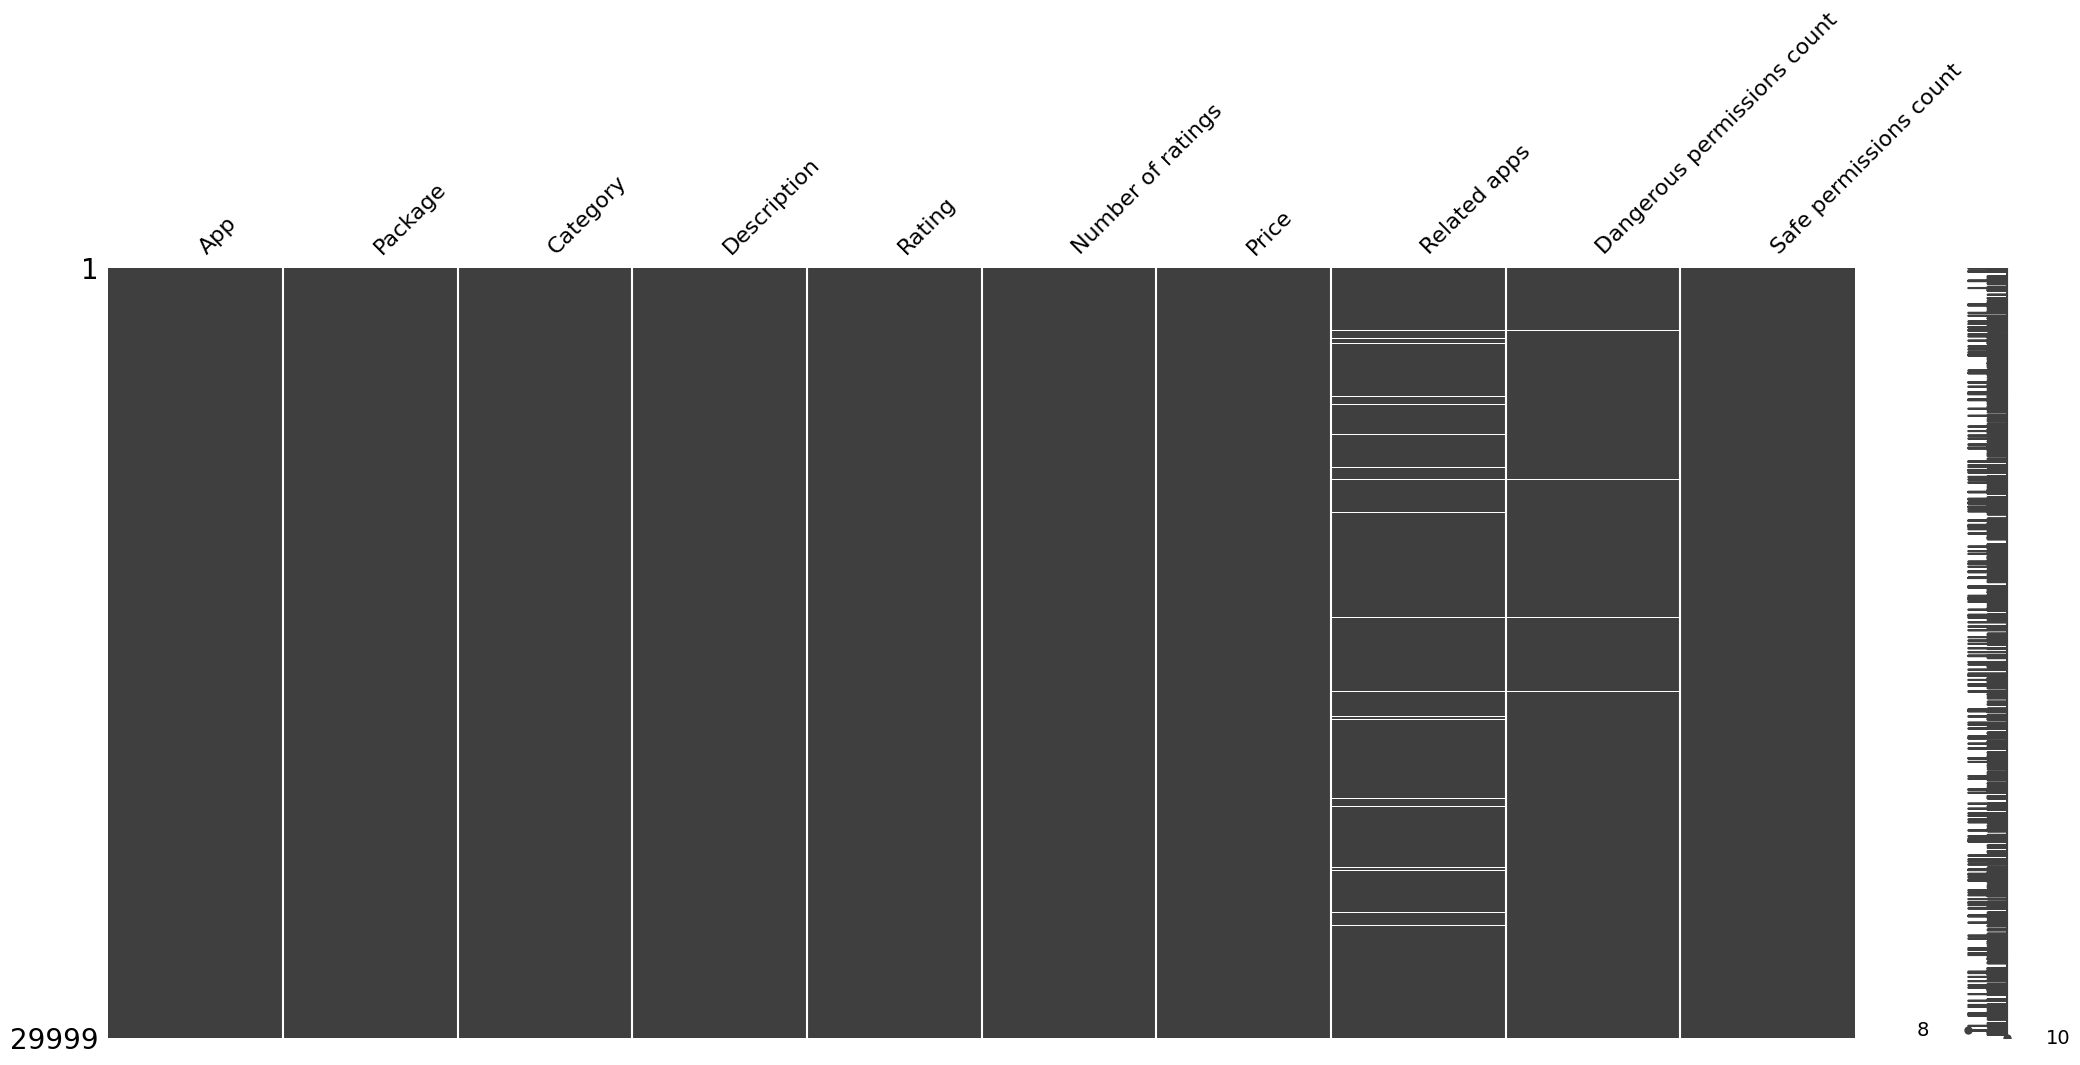

In [9]:
import missingno as msno
# visualize the null values in the first 10 columns of the DataFrame
msno.matrix(data.iloc[:, :10])

### What did you know about your dataset?

This file contains 30000 Rows and 184 columns but there is lots of duplicated data in the Apps features means 7175 Apps are duplicated due to duplication or may be some other reasons like mupltiple rating with same Apps so  we have to work on it and also for the first 10 columns have almost 1000 missing values mostly in "Related Apps" and "Dangerous Permission Count" columns so also we have to work on it further.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
data.columns

Index(['App', 'Package', 'Category', 'Description', 'Rating',
       'Number of ratings', 'Price', 'Related apps',
       'Dangerous permissions count', 'Safe permissions count',
       ...
       'Your personal information : read calendar events (D)',
       'Your personal information : read contact data (D)',
       'Your personal information : read sensitive log data (D)',
       'Your personal information : read user defined dictionary (D)',
       'Your personal information : retrieve system internal state (S)',
       'Your personal information : set alarm in alarm clock (S)',
       'Your personal information : write Browser's history and bookmarks (D)',
       'Your personal information : write contact data (D)',
       'Your personal information : write to user defined dictionary (S)',
       'Class'],
      dtype='object', length=184)

In [11]:
# Dataset Describe
data.describe(include= "all")

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,...,Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
count,29998,29999,29999,29996,29999.000000,2.999900e+04,29999.000000,29244,29795.000000,29999.000000,...,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000
unique,22823,23485,30,23552,NaN,NaN,NaN,23868,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Tic Tac Toe,com.shazam.android,Entertainment,Phrasebook and Translator contains all the ess...,NaN,NaN,NaN,{com.openkava.spinpic},NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,47,10,2827,40,NaN,NaN,NaN,38,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.537215,6.852608e+03,0.625707,NaN,3.111160,1.353978,...,0.014667,0.087970,0.023801,0.001333,0.000567,0.000400,0.016567,0.039735,0.001500,0.666689
std,NaN,NaN,NaN,NaN,1.424685,4.586899e+04,3.222620,NaN,3.052602,1.523491,...,0.120219,0.283255,0.152431,0.036492,0.023799,0.019997,0.127645,0.195338,0.038702,0.471405
min,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,3.300000,4.000000e+00,0.000000,NaN,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,4.000000,4.600000e+01,0.000000,NaN,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,NaN,NaN,NaN,NaN,4.400000,7.160000e+02,0.000000,NaN,4.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


### Variables Description

1. App:- Name of the App

2. Package:-OBB/Data package installed in root folder

3. Category:- App Category (eg. Entertainment, Adventure, puzzle, Action, Antivirus, etc.)

4. Description:- App Description

5. Rating:- Rating out of 5

6. Number of ratings:- No. of Ratings given by users

7. Price:- Price of the App

8. Related apps:- Apps related to installed App

9. Dangerous (D) permissions count:- No. of Dangerous Permissions allowed by user

10. Safe (S) permissions count-No. of Safe Permissions allowed by user

11. Default: Access DRM content. (S):-0: No. 1: Yes

12. Default: Access Email provider data (S)- O: No, 1: Yes

13. Default: Access all system downloads (S):-0: No. 1: Yes

14. Default: Access download manager. (S):-O: No. 1: Yes

15. Default: Advanced download manager functions. (S)-0: No. 1: Yes

16. Default: Audio File Access (S)-0 No. 1: Yes

17. Default: Install DRM content. (S)-0: No. 1: Yes

18. Default: Modify Google service configuration (S)- O: No, 1: Yes

19. Default: Modify Google settings (S)-0: No, 1: Yes

20. Default: Move application resources (S)-0: No. 1: Yes

21. Default: Read Google settings (S)-0: No, 1: Yes

22. Default: Send download notifications. (S)-0: No, 1: Yes

23. Default: Voice Search Shortcuts (S)-0: No, 1: Yes

24. Default access SurfaceFinger (S)-0: No.1: Yes

25. Default: access checkin properties (S): 0:No, 1:

26. Default: access the cache filesystem (S)-0: No. 1: Yes

27. Default: access to passwords for Google accounts (S):-0: No, 1: Yes

28. Default: act as an account authenticator (S):-0: No, 1: Yes

29. Default: bind to a wallpaper (S)-0: No. 1: Yes

30. Default: bind to an input method (S):-0: No.1: Yes

31. Default: change screen orientation (S)-0: No., 1: Yes

32. Default: coarse (network-based) location (S)-0: No, 1: Yes

33. Default: control location update notifications (S)-0: No, 1: Yes

34. Default: control system backup and restore (S)-0: No. 1: Yes

35. Default: delete applications (S):-0: No, 1: Yes

36. Default: delete other applications' caches (S)-0: No, 1: Yes

37. Default: delete other applications' data (S):-0: No, 1: Yes

38. Default: directly call any phone numbers (S):-0: No. 1: Yes

39. Default: directly install applications (S)-0: No. 1: Yes

40. Default: disable or modify status bar (S)-O: No. 1: Yes

41. Default: discover known accounts (S)-O: No. 1: Yes

42. Default: display unauthorized windows (S): -0: No. 1: Yes

43. Default: enable or disable application components (S)-0: No, 1: Yes

44. Default: force application to close (S)-0:No. 1: Yes

45. Default force device reboot (S)-0: No. 1: Yes

46. Default: full Internet access (S)-0: No. 1: Yes

47. Default: interact with a device admin (S)-0: No. 1: Yes

48. Default: manage application tokens (S)-0: No. 1: Yes

49. Default: mock location sources for testing (S)-0: No. 1: Yes

50. Default: modify battery statistics (S)-0: No. 1: Yes

51. Default: modify secure system settings (S)-0: No. 1: Yes

52. Default: modify the Google services map (S)-0: No, 1:Yes

53. Default: modify/delete USB storage contents modify/delete SD card contents (S)-0:

54. Default: monitor and control all application launching (S)-0: No. 1: Yes

55. Default: partial shutdown (S)-O: No. 1: Yes

56. Default: permanently disable device (S)-0: No.1: Yes

57. Default: permission to install a location provider (S)-0: No. 1: Yes

58. Default: power device on or off (S)-0: No, 1: Yes

59. Default: press keys and control buttons (S):-0: No, 1: Yes

60. Default: prevent app switches (S)-0: No. 1: Yes

61. Default: read frame buffer (S)-0: No.1: Yes

62. Default: read instant messages (S)-0: No. 1: Yes

63. Default read phone state and identity (S)-0: No. 1: Yes

64. Default: record what you type and actions you take (S): O: No. 1: Yes

65. Default: reset system to factory defaults ($):-O: No. 1: Yes

66. Default: run in factory test mode (S)-0: No. 1: Yes

67. Default: set time ($):-0: No. 1: Yes

68. Default: set wallpaper size hints (S)-0: No. 1: Yes

69. Default: start IM service (S)-0: No. 1: Yes

70. Default: update component usage statistics (S)-0: No. 1: Yes

71. Default: write contact data (S)-0: No. 1: Yes

72. Default: write instant messages (S)-0 No. 1: Yes

73. Development tools: enable application debugging (D):-0: No. 1: Yes

74. Development tools: limit number of running processes (D) O:No. 1: Yes

75. Development tools: make all background applications close (D):- O: No. 1: Yes

76. Development tools: send Linux signals to applications (D)- O: No, 1: Yes

77. Hardware controls: change your audio settings (D):-0: No.1: Yes

78. Hardware controls: control flashlight (S)-O:No.1: Yes

79. Hardware controls: control vibrator (S)-O: No.1: Yes

80. Hardware controls: record audio (0)-0: No. 1: Yes

81. Hardware controls: take pictures and videos (D):-O: No. 1: Yes

82. Hardware controls: test hardware (S)-O: No, 1: Yes

83. Network communication: Broadcast data messages to applications. (S):- O: No. 1: Yes

84. Network communication: control Near Field Communication (D):-0: No. 1: Yes

85. Network communication: create Bluetooth connections (D):-0: No. 1: Yes

86. Network communication: download files without notification (S)-0: No, 1: Yes

87. Network communication: full Internet access (D):-0: No, 1: Yes

88. Network communication: make/receive Internet calls (D)-0: No, 1: Yes

89. Network communication: receive data from Internet (S)-0: No. 1: Yes

90. Network communication: view Wi-Fi state (S)-0: No. 1: Yes

91. Network communication: view network state (S):-0: No. 1: Yes

92. Phone calls: intercept outgoing calls (D):-0: No. 1: Yes

93. Phone calls: modity phone state (S)-O: No. 1: Yes

94. Phone calls: read phone state and identity (D)-O: No, 1: Yes

95. Services that cost you money: directly call phone numbers (D):- 0 No. 1: Yes

96. Services that cost you money: send SMS messages (D):-0: No. 1: Yes

97. Storage: modify/delete USB storage contents modify/delete SD card contents (D)-0: No. 1: Yes

98. System tools: allow Wi-Fi Multicast reception (D):-0: No. 1: Yes

99. System tools: automatically start at boot (S)-0: No, 1: Yes

100. System tools: bluetooth administration (D):- O: No. 1: Yes

101. System tools: change Wi-Fi state (D)-O: No, 1: Yes

102. Systern tools: change background data usage setting (S)-0: No, 1: Yes

103. Systern tools: change network connectivity (D)-0 No. 1: Yes

104. System tools: change your Ul settings (D)-0: No, 1: Yes

105. System tools: delete all application cache data (D)-0: No. 1: Yes

106. System tools: disable keylock (D)-0: No. 1: Yes

107. Systern tools: display system-level alerts (D): 0:No. 1: Yes

108. Systern tools: expand/collapse status bar (5)-0: No. 1: Yes

109. System tools: force stop other applications (S)-0: No. 1: Yes

110. System tools: format external storage (D):-0: No, 1: Yes

111. System tools: kill background processes (S)-0: No. 1: Yes

112. System tools: make application always run (D)-0: No. 1: Yes

113. System tools: measure application storage space (S)-0: No. 1: Yes

114. System tools: modify global animation speed (D):-0: No. 1: Yes

115. System tools: modify global system settings (D):-0: No. 1: Yes

116. System tools: mount and unmount filesystems (D):-0: No. 1: Yes

117. System tools: prevent device from sleeping (D):-0: No. 1: Yes

118. System tools: read subscribed feeds (S)-O: No, 1: Yes

119. System tools: read sync settings (S)-0: No, 1: Yes

120. System tools: read sync statistics (S)-0: No. 1: Yes

121. System tools: read/write to resources owned by diag (S)-0: No. 1: Yes

122. System tools reorder running applications (D)-0: No. 1: Yes

123. System tools: retrieve running applications (D)-0: No, 1: Yes

124. System tools: send package removed broadcast (S)-0: No. 1: Yes

125. Systern tools: send sticky broadcast (S)-0: No, 1: Yes

126. System tools: set preferred applications (S)-0: No, 1: Yes

127. System tools: set time zone (D)-0: No. 1: Yes

128. System tools: set wallpaper (S):- O: No. 1: Yes

129. Systern tools: set wallpaper size hints (S):-O: No. 1: Yes

130. System tools: write Access Point Name settings (D):- O: No. 1: Yes

131. System tools: write subscribed feeds (D):- O: No. 1: Yes

132. System tools: write sync settings (D):- O: No. 1: Yes

133. Your accounts: Blogger (D):-0: No.1: Yes

134. Your accounts: Google App Engine (D):-0: No, 1: Yes

135. Your accounts: Google Docs (D)-0: No, 1: Yes

136. Your accounts: Google Finance (D):-0: No. 1: Yes

137. Your accounts: Google Maps (D)-0: No. 1: Yes

138. Your accounts: Google Spreadsheets (D):-0: No, 1: Yes

139. Your accounts: Google Voice (D):-0: No, 1: Yes

140. Your accounts: Google mail (D)-0: No. 1: Yes

141. Your accounts: Picasa Web Albums (D):-0: No, 1: Yes

142. Your accounts: YouTube (D)-0: No.1: Yes

143. Your accounts: YouTube usernames (D)-0. No.1: Yes

144. Your accounts: access all Google services (S): O: No, 1: Yes

145. Your accounts: access other Google services (D):-O No. 1: Yes

146. Your accounts: act as an account authenticator (D):- O: No, 1: Yes

147. Your accounts: act as the AccountManagerService (S)- O: No, 1: Yes

148. Your accounts: contacts data in Google accounts (D):- O: No.1: Yes

149. Your accounts: discover known accounts (S)-0: No. 1: Yes

150. Your accounts: manage the accounts list (D)-0: No. 1: Yes

151. Your accounts: read Google service configuration (S)-0: No. 1: Yes

152. Your accounts use the authentication credentials of an account (D)-0: No. 1: Yes

153. Your accounts: view configured accounts (S)-0: No.1: Yes

154. Your location: access extra location provider commands (S)-O: No., 1: Yes

155. Your location: coarse (network-based) location (D)-0: No. 1: Yes

156. Your location: fine (GPS) location (D):-0: No, 1: Yes

157. Your location: mock location sources for testing (D):-O No.1: Yes

158. Your messages: Read Email attachments (D):-0: No, 1: Yes

159. Your messages: Send Gmail (S)-0: No.1: Yes

160. Your messages: edit SMS or MMS (D):-0: No.1: Yes

161. Your messages: modify Gmail (D):-0: No. 1: Yes

162. Your messages: read Gmail (D)-0: No. 1: Yes

163. Your messages: read Gmail attachment previews (D):-O: No. 1: Yes

164. Your messages: read SMS or MMS (D)-0: No. 1: Yes

165. Your messages: read instant messages (D)-0: No. 1: Yes

166. Your messages: receive MMS (D)-0: No. 1: Yes

167. Your messages: receive SMS (D):-0: No. 1: Yes

168. Your messages: receive WAP (D):-0: No, 1: Yes

169. Your messages: send SMS-received broadcast (S)-O:No. 1: Yes

170. Your messages: send WAP-PUSH-received broadcast (S)-0: No. 1: Yes

171. Your messages: write instant messages (D):- O: No. 1: Yes

172. Your personal information: add or modify calendar events and send email to guests (D):-0: No. 1: Yes

173. Your personal information: choose widgets (S)-0: No. 1: Yes

174. Your personal information: read Browser's history and bookmarks (D)-0: No. 1: Yes

175. Your personal information: read calendar events (D)-0: No. 1: Yes

176. Your personal information: read contact data (D):-0: No. 1: Yes

177. Your personal information: read sensitive log data (D)-0: No. 1: Yes

178. Your personal information: read user defined dictionary (D)-0: No. 1: Yes

179. Your personal information : retrieve system internal state (S)-0: No, 1: Yes

180. Your personal information: set alarm in alarm clock (5)-0: No.1: Yes

181. Your personal information: write Browser's history and bookmarks (D):-O: No, 1: Yes

182. Your personal information: write contact data (D)-0: No, 1: Yes

183. Your personal information: write to user defined dictionary (S)-0: No, 1: Yes

184. Class-0: Benign, 1: Malware

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for first 10 independent cols
data.iloc[:, :10].nunique()

,0
App,22823
Package,23485
Category,30
Description,23552
Rating,42
Number of ratings,5312
Price,425
Related apps,23868
Dangerous permissions count,28
Safe permissions count,16


In [13]:
# Count the number of unique values in each column
unique_counts = data.nunique()
print(unique_counts)

print("--------------------------------------------------------------------------------------------------------------------------")

# Get the columns where the count is equal to 1
unique_ones = unique_counts[unique_counts == 1]
print('Count of True Columns where the unique values are either one or Zero is :',len(unique_ones))
print("--------------------------------------------------------------------------------------------------------------------------")

# Select the corresponding columns from the original DataFrame
unique_columns = data.loc[:, unique_ones.index]

# Get the details of the unique columns
unique_columns.info()

App                                                                      22823
Package                                                                  23485
Category                                                                    30
Description                                                              23552
Rating                                                                      42
                                                                         ...  
Your personal information : set alarm in alarm clock (S)                     2
Your personal information : write Browser's history and bookmarks (D)        2
Your personal information : write contact data (D)                           2
Your personal information : write to user defined dictionary (S)             2
Class                                                                        2
Length: 184, dtype: int64
---------------------------------------------------------------------------------------------------------

## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.
# Make a copy of the dataset so the original data prevented
df = data.copy()

In [15]:
#Drop columns with single value :
df = df.loc[:, df.nunique() > 1]

In [16]:
df.shape

(29999, 162)

In [17]:
# Find the number of missing values
# Calculate the sum of null values in each column
null_counts = df.isnull().sum()

# Print column names that have null values
for column, null_count in null_counts.items():
    if null_count > 0:
        print(f"Column '{column}' has {null_count} null values.")

Column 'App' has 1 null values.
Column 'Description' has 3 null values.
Column 'Related apps' has 755 null values.
Column 'Dangerous permissions count' has 204 null values.


Drop the null values of the columns :

In [18]:
df = df.dropna(subset=['App','Dangerous permissions count','Description','Related apps'])

In [19]:
df.shape

(29240, 162)

In [20]:
# top 5 apps in each category without filtering data where rating is 5 star
top_apps = df.groupby('Category').apply(lambda x: x.nlargest(5, 'Rating')).drop_duplicates(subset='App')
# Set the maximum number of rows and columns to display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the result
print(top_apps[['App','Rating']])

                                                          App  Rating
Category                                                             
Arcade & Action   255                            Avoid A Ball     5.0
                  1096                    Awesome Crime Games     5.0
                  1525                          Bowl Em Hoops     5.0
                  2514                   Zombie Tower Defense     5.0
                  3660              Romantic Love Backgrounds     5.0
Books & Reference 57               US Army Rifle Marksmanship     5.0
                  179    Japanese&lt;&gt;Polish Dictionary TR     5.0
                  269     Danish&lt;&gt;Turkish Dictionary TR     5.0
                  428                    The Power of Tongues     5.0
                  674                             appTelGuide     5.0
Brain & Puzzle    62                          Turning Melo HD     5.0
                  261              Ultimate Challenge: Sudoku     5.0
                  67

In [21]:
# Group the data by Category and get the Median of Number of Ratings for each Category
category_nratings = df.groupby('Category')['Number of ratings'].median()

# Sort the Categories by the median of Ratings in descending order and get the dataframe for it
top_categories = category_nratings.sort_values(ascending=False)

# Display the result
print('Categories with Average Total Number of Ratings :-\n')

# creating dataframe for the top category with its number of ratings
no_of_rating_df = pd.DataFrame(top_categories)
no_of_rating_df

Categories with Average Total Number of Ratings :-



,Number of ratings
Category,
Racing,581.0
Productivity,528.5
Communication,527.5
Arcade & Action,411.0
Sports Games,315.0
Media & Video,257.0
Weather,207.5
Cards & Casino,161.0
Social,153.0


In [22]:
# Group the data by Category and get the median of Ratings for each Category
category_rating = df.groupby('Category')['Rating'].median()

# Sort the Categories by the median of Ratings in descending order
top_categories_by_rating = category_rating.sort_values(ascending=False).head(10)

# Display the result

print('Top 10 Categories with maximum Average Ratings - \n')

# creating dataframe for the top category with its number of ratings
rating_df = pd.DataFrame(top_categories_by_rating)
rating_df

Top 10 Categories with maximum Average Ratings - 



,Rating
Category,
Productivity,4.3
Education,4.2
Finance,4.2
Tools,4.2
Transportation,4.2
Communication,4.2
Music & Audio,4.1
Personalization,4.1
Social,4.1


In [23]:
 # Finding Free apps with 'Number of ratings' greater than 5000 and 'Rating' greater than 4
top_free_apps = df[(df['Price'] == 0) & (df['Number of ratings'] > 5000) & (df['Rating'] > 4)]
# Sorting Free apps based on ratings
top_free_apps_sorted = top_free_apps.sort_values('Rating', ascending=False)
# Top 10 free apps
top_10_free_apps = top_free_apps_sorted.head(10)
top_10_free_apps[['App', 'Number of ratings','Rating']]

,App,Number of ratings,Rating
743,Super Stickman Golf,9101,4.9
29113,Super Stickman Golf,9457,4.9
16807,Help Out,7327,4.8
17692,Stardunk,39534,4.8
6435,Stardunk,39399,4.8
27816,Uplifting Psalms Daily Bible,5029,4.8
23334,Battle.net Authenticator,16324,4.8
24958,Poker KinG Pro-Texas Holdem,7944,4.8
18870,Backgrounds,46094,4.8
21914,7 Little Words,46408,4.8


###Feature Selection Using Statistical Tests

In [24]:
from scipy.stats import ttest_ind, chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif,mutual_info_classif

#Separate numerical & categorical columns
numerical_columns = df.select_dtypes( include= [int, float]).columns

categorical_columns = df.select_dtypes([object]).columns

# Create a dictionary to store p-values
p_values = {}

# iterate over numerical columns
for col in numerical_columns:
    # perform t-test
    t_stat, p_val = ttest_ind(df[df['Class'] == 0][col], df[df['Class'] == 1][col])
    p_values[col] = p_val

# iterate over categorical columns
le = LabelEncoder()
for col in categorical_columns:
    # perform chi-squared test
    contingency_table = pd.crosstab(df[col], df['Class'])
    chi2, p_val, _, _ = chi2_contingency(contingency_table)
    p_values[col] = p_val

# select columns with p-value less than a threshold
selected_cols = [col for col, p_val in p_values.items() if p_val < 0.05]


# Ensure 'Class' is not duplicated by removing it from 'selected_cols' if already present
selected_cols = [col for col in selected_cols if col != 'Class']

# create a new dataframe with the selected columns
final_df = df[selected_cols + ['Class']]


In [25]:
final_df.shape

(29240, 71)

In [26]:
final_df.columns.tolist()


['Rating',
 'Number of ratings',
 'Price',
 'Dangerous permissions count',
 'Safe permissions count',
 'Default : Access DRM content. (S)',
 'Default : Install DRM content. (S)',
 'Default : Modify Google settings (S)',
 'Default : Voice Search Shortcuts (S)',
 'Default : bind to a wallpaper (S)',
 'Default : delete applications (S)',
 "Default : delete other applications' data (S)",
 'Default : directly install applications (S)',
 'Default : display unauthorized windows (S)',
 'Default : force device reboot (S)',
 'Default : interact with a device admin (S)',
 'Default : modify secure system settings (S)',
 'Default : power device on or off (S)',
 'Default : read frame buffer (S)',
 'Default : set time (S)',
 'Hardware controls : control vibrator (S)',
 'Hardware controls : take pictures and videos (D)',
 'Network communication : full Internet access (D)',
 'Network communication : view network state (S)',
 'Phone calls : read phone state and identity (D)',
 'Services that cost you mo

The Significant columns are those columns which have their P-Value less than 0.05 and selection those columns would simplify the ML model and make easy to handle data.

### What all manipulations have you done and insights you found?

The following manupulation that i have done :▶

  > As the columns which only have a single constant value doesn't contribute in ML model and the significance of such columns would be NULL. So its better to drop such columns. This made Columns from 184 to 162.

  > We can see that Racing has an average of 581 numbers of overall ratings for a particular app in that particular category followed by Racing and Productivity & Communication with 528.5 and 527.5 number of overall ratings.

  > Next we have found the dataframe of top 10 apps with average rating of range (4.3 to 4.1) star.

  > We also use the P-Value to select the significant columns to simplify the Machine learning model.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - **Distribution of Classes**

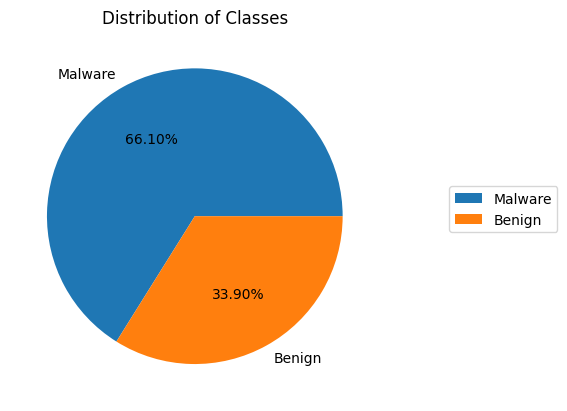

In [27]:
# Chart - 1 visualization code
class_counts = final_df['Class'].value_counts()

# Create the pie chart
plt.pie(class_counts, labels=[ 'Malware','Benign'], autopct='%1.2f%%')
plt.figsize=(20,20)
# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 0.6))
# Show the chart
plt.title('Distribution of Classes')
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart is an excellent choice for visualizing the distribution of categorical data. It clearly shows the proportion of each category relative to the whole. In this case, we want to understand the distribution of two classes: Malware and Benign. A pie chart is a simple and effective way to visualize this.

##### 2. What is/are the insight(s) found from the chart?

* The chart reveals a significant class imbalance, with Malware comprising approximately **66.1%** of the dataset and Benign making up the remaining **33.9%**.

* Malware is the dominant class, indicating that the dataset is skewed towards malicious samples.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Understanding the class imbalance can guide the development of machine learning models. Techniques like oversampling, undersampling, or class weighting can be employed to address the imbalance and improve model performance.

* The imbalance suggests that collecting more benign samples could help balance the dataset and improve model generalization.

#### Chart - 2 - **Number of Apps  of each Categories**

Number of categories = 30


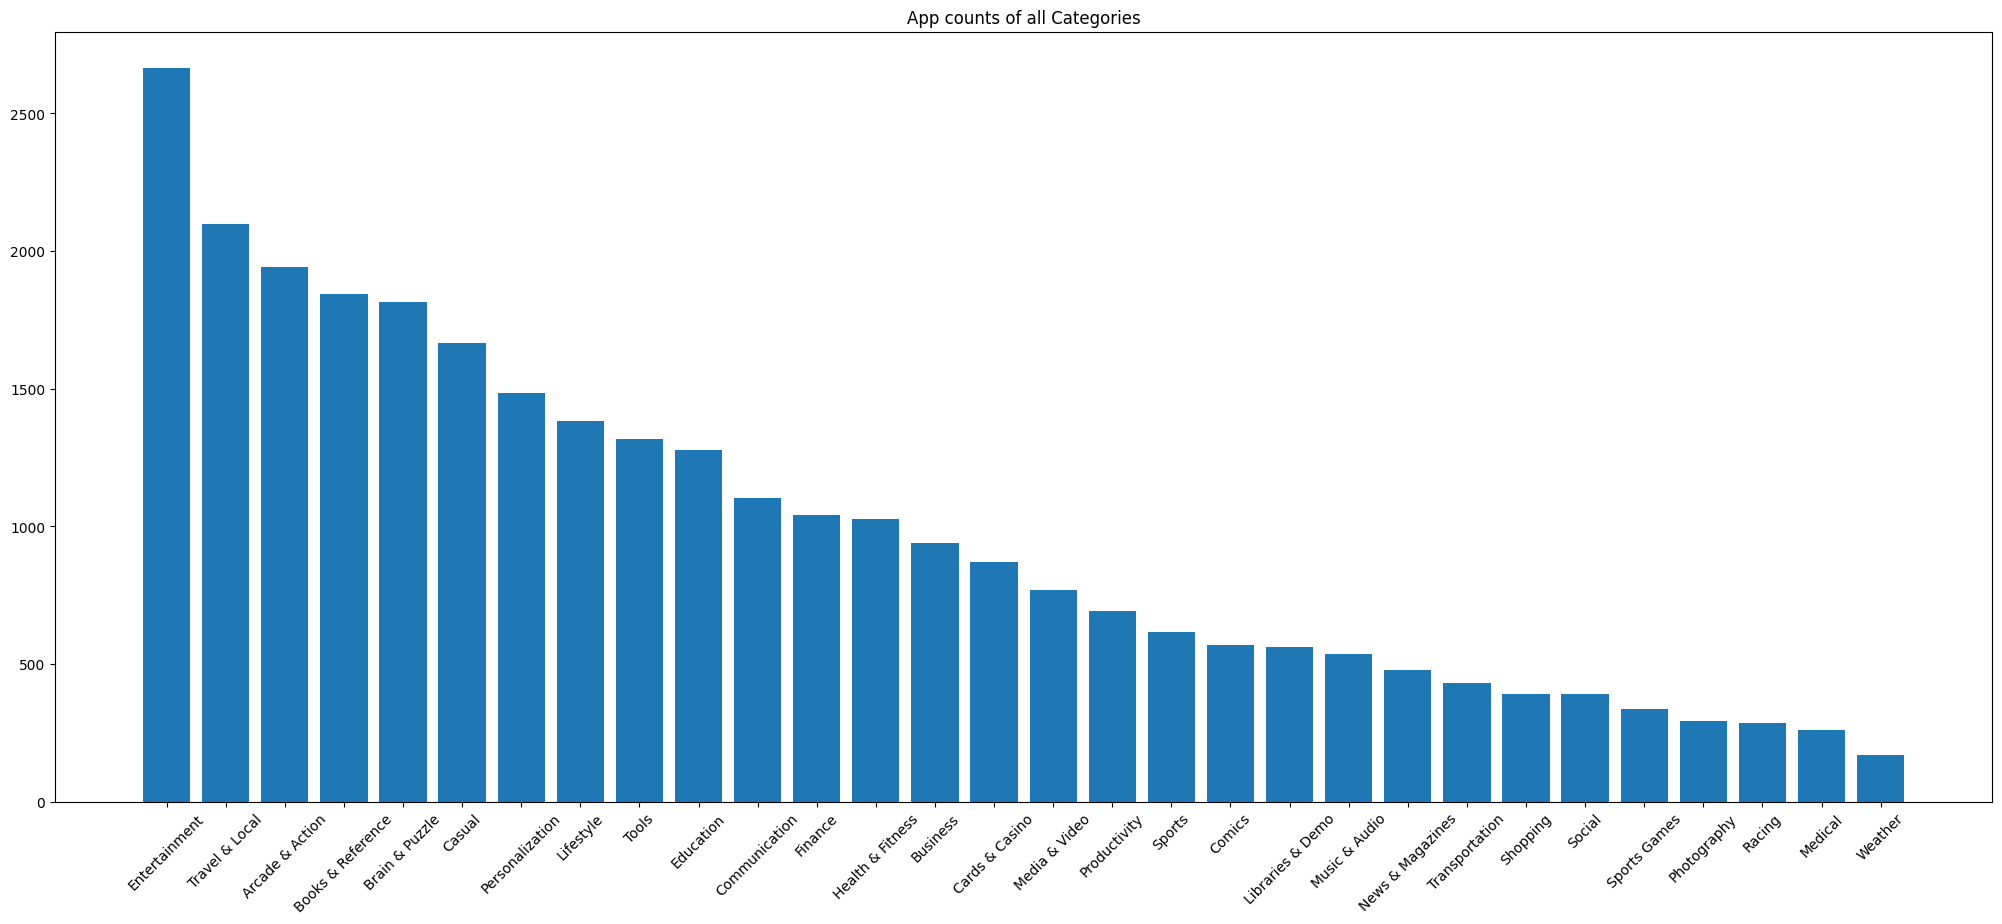

In [28]:
# Chart - 2 visualization code
# Print the total number of unique categories
App_category = len(final_df["Category"].unique())
print(f"Number of categories = {App_category}")
# Count the number of apps in each 'Category' and sort them in descending order
App_categories = final_df["Category"].value_counts().sort_values(ascending = False)

# Plotting bar graph to visualise different categories
plt.figure(figsize=(25,10))
plt.bar(App_categories.index, # index = category name
        App_categories.values) # value = count
plt.xticks(rotation=45)
plt.title('App counts of all Categories')
plt.show()

##### 1. Why did you pick the specific chart?

A **bar plot** in Python is a visual representation of data using bars of different heights. It is a type of plot that displays the relationship between a variable and one or more other variables, usually in the form of a bar chart. A bar plot can indicate the differences between groups and makes it easy to compare the same data points across multiple categories. Bar plots are commonly used in data visualization to display quantitative information about a set of variables.

##### 2. What is/are the insight(s) found from the chart?

* We can see that there are 30 unique app categories present in our dataset. Entertainment apps have the highest market prevalence. After that Travel & Local has a prevalence. Interestingly, Books & Reference, Arcade & Action, Brain & Puzzle and Casual apps have slightly equal weightage of market prevalence.

* Category Ranking: The bars are arranged in descending order, providing a clear ranking of categories based on the number of apps. This helps identify the most popular and least popular categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Understanding the distribution of apps across categories can help developers and publishers identify niche markets with less competition.

* By analyzing the popularity of different categories, app developers can target their marketing efforts towards categories with higher user interest.

#### Chart - 3 - **Density of Dangerous permissions Count**

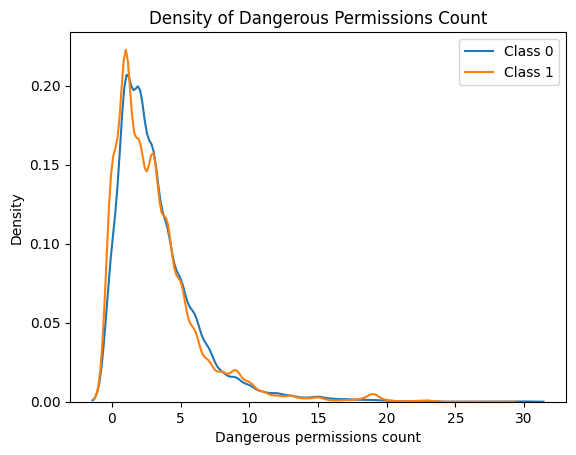

In [29]:
# Chart - 3 visualization code
sns.kdeplot(final_df[final_df['Class']==0]['Dangerous permissions count'], label = 'Class 0')
sns.kdeplot(final_df[final_df['Class']==1]['Dangerous permissions count'], label = 'Class 1')

plt.xlabel('Dangerous permissions count')
plt.ylabel('Density')
plt.title('Density of Dangerous Permissions Count')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

* I picked this chart because it show the distribution of the number of dangerous permissions requested by apps, categoriezed by their calss(benign & malicious).

* This visual representation helps to understand the relationship betweeen the number of dangerous permissions and the likelihood of an app being malicious.

##### 2. What is/are the insight(s) found from the chart?

* Distribution Shape: Both Class 0 and Class 1 exhibit a similar right-skewed distribution, indicating that most instances have a lower count of dangerous permissions, with fewer instances having a higher count.

* Separation: There is some overlap between the two distributions, but Class 0 generally has a higher density at lower counts, while Class 1 has a slightly higher density at higher counts. This suggests a potential difference in the distribution of dangerous permissions between the two classes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The separation between the distributions suggests that there might be meaningful differences in the behavior or characteristics associated with Class 0 and Class 1. This understanding can be used to develop targeted strategies or interventions.

* The density plot can help identify outliers or extreme cases with unusually high counts of dangerous permissions. These outliers might warrant further investigation or mitigation.

#### Chart - 4 - **Density of Safe permissions Count**

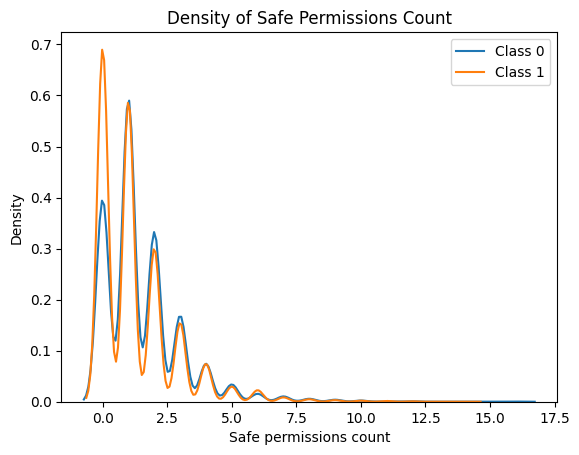

In [30]:
# Chart - 4 visualization code
sns.kdeplot(final_df[final_df['Class']==0]['Safe permissions count'], label = 'Class 0')
sns.kdeplot(final_df[final_df['Class']==1]['Safe permissions count'], label = 'Class 1')

plt.xlabel('Safe permissions count')
plt.ylabel('Density')
plt.title('Density of Safe Permissions Count')
plt.legend()
plt.show()


##### 1. Why did you pick the specific chart?

* A density plot is an ideal choice for visualizing the distribution of a continuous numerical variable.

* Inthis case, we want to understand the distribution of "safe permissions count" for two classes (benign-0 and malicious-1). Density plots provide a smooth representation of the probability density function, allowing us to see how the values are distributed within each class.

##### 2. What is/are the insight(s) found from the chart?

* Both Class 0 and Class 1 exhibit a similar right-skewed distribution, indicating that most instances have a lower count of safe permissions, with fewer instances having a higher count.

* There is some overlap between the two distributions, but Class 0 seems to have a slightly higher density at lower counts, while Class 1 has a slightly higher density at higher counts. This suggests a potential difference in the distribution of safe permissions between the two classes.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* While understanding the distribution of safe permissions can aid in developing better app security measures for 'safe' and 'risky' apps, there's a potential downside.
* If the classes represent 'high-quality' and 'low-quality' apps, the insights might unintentionally lead to biased decisions. For instance, favoring apps with a higher number of safe permissions could stifle innovation and harm the development of valuable apps that might have a lower number of safe permissions."

#### Chart - 5 - **Distribution of Rating**

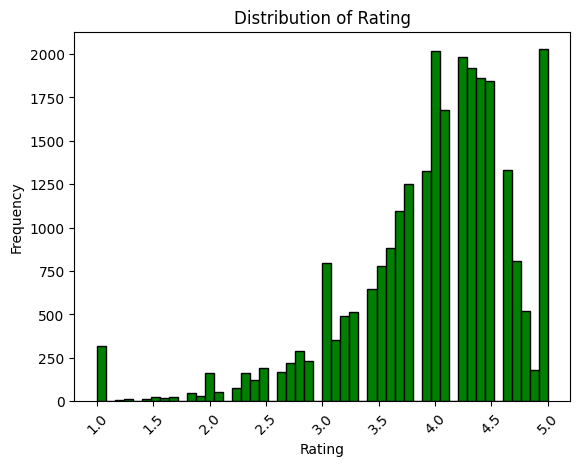

In [31]:
# Chart - 5 visualization code
# Filter out ratings where Rating is greater than 0
filtered_ratings = final_df[final_df['Rating'] > 0]['Rating']

# Create the histogram
plt.hist(filtered_ratings, edgecolor='black', color="green", bins=50)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Rating')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

* The histogram is a excellent choice to visualize the distribution of a continuous valriable. It allows us to view the frequency of rating.

##### 2. What is/are the insight(s) found from the chart?

* The distribution is positively skewed, meaning the distribution appears to be skewed towards higher ratings, with a peak around 4-5. This suggests that a majority of users tend to give higher ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The distribution of ratings provides valuable insights into customer satisfaction. By understanding the factors that contribute to low ratings and taking proactive steps to address them, businesses can improve their products or services and enhance customer satisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 6

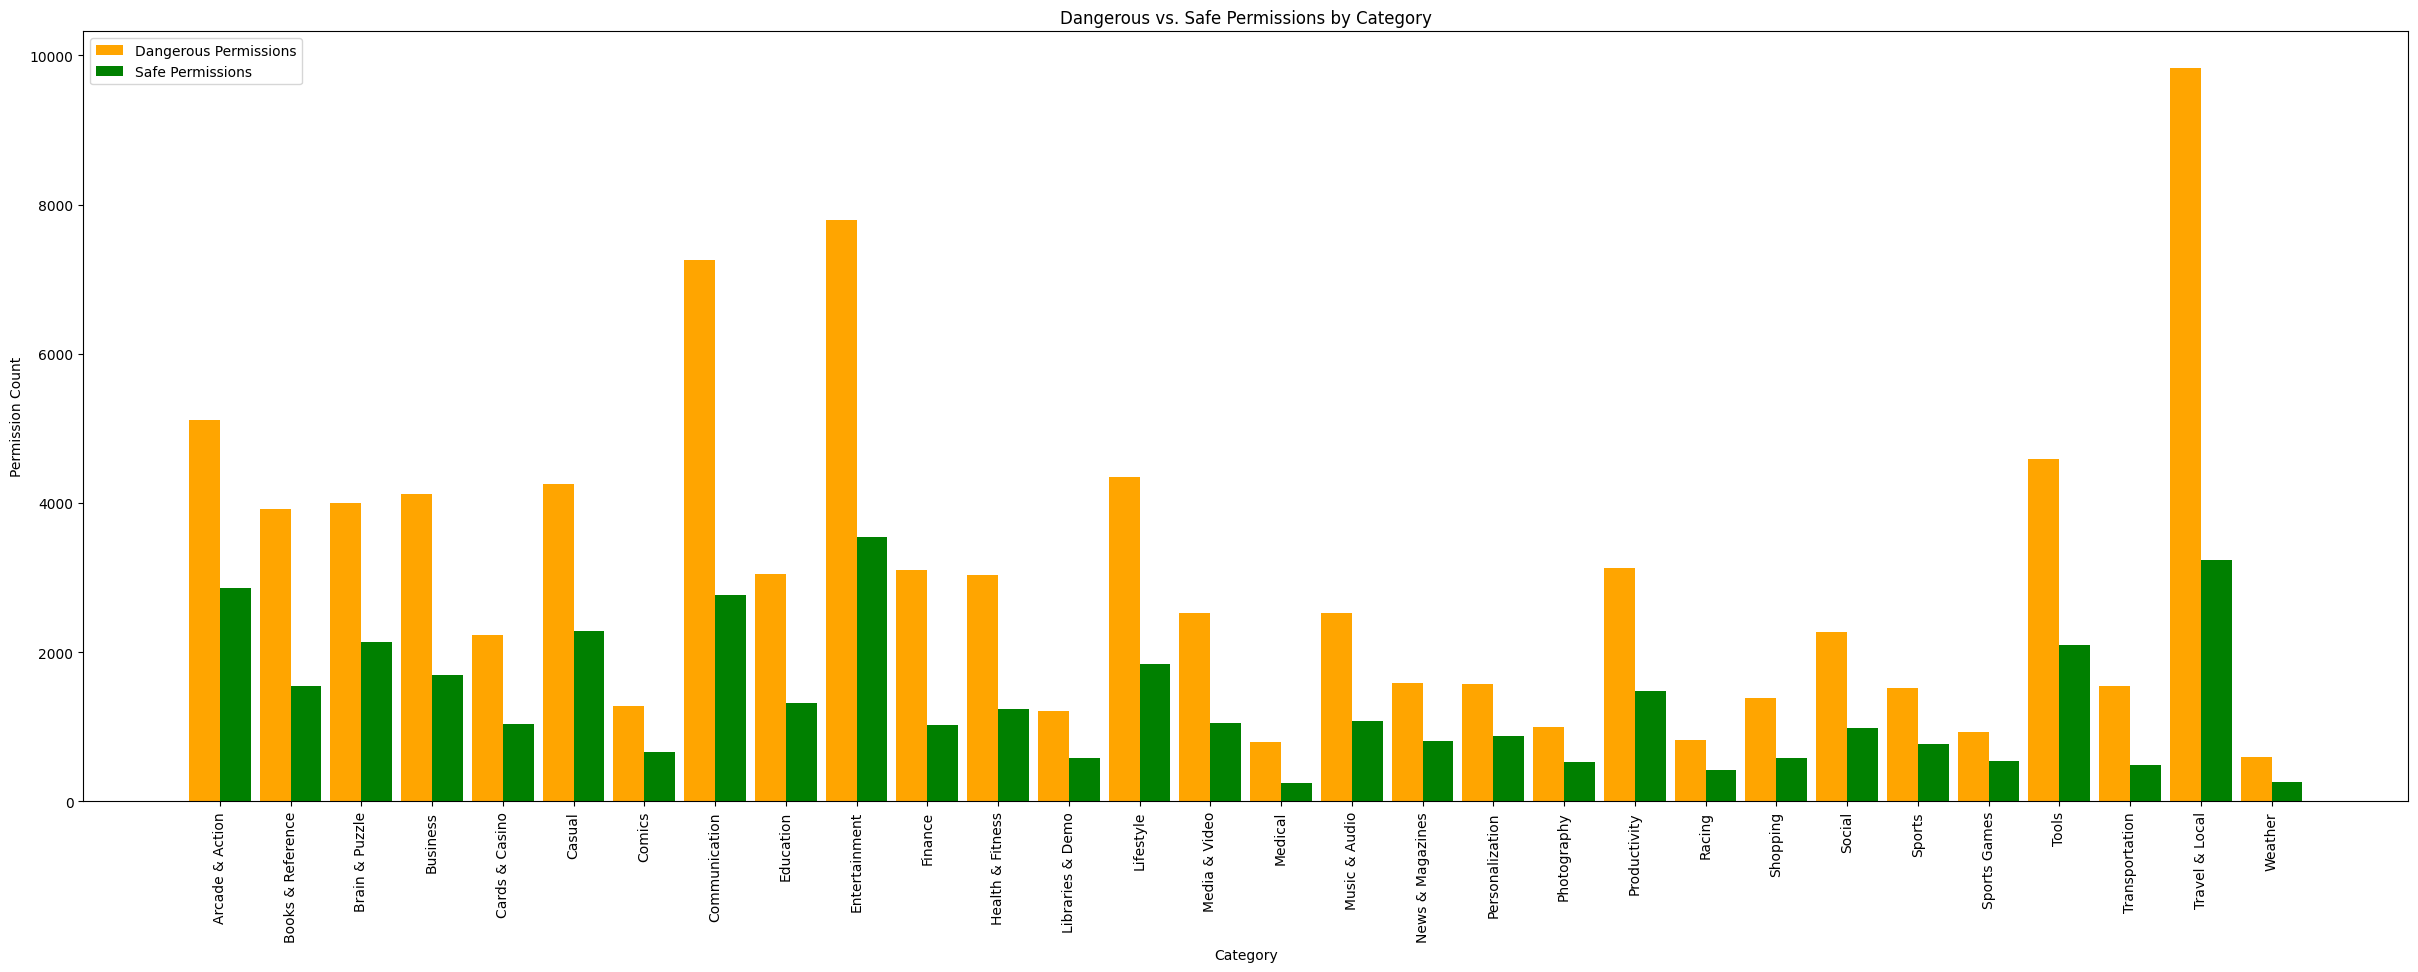

In [32]:
# Group data by category and sum up permission counts
grouped_df = final_df.groupby('Category').sum().reset_index()

# Set the width of the bars and the spacing between groups
bar_width = 0.35
group_width = 0.8

# Create an index for each category, with spacing between groups
index = range(len(grouped_df))
index = [i * group_width for i in index]

# Create the bar chart with two bars for each category
plt.figure(figsize=(30, 10))
plt.bar(index, grouped_df['Dangerous permissions count'], bar_width, label='Dangerous Permissions', color='orange')
plt.bar([i + bar_width for i in index], grouped_df['Safe permissions count'], bar_width, label='Safe Permissions', color='green')

# Set x-axis labels with categories
plt.xticks([i + bar_width / 2 for i in index], grouped_df['Category'], rotation=90)
plt.xlabel('Category')
plt.ylabel('Permission Count')
plt.title('Dangerous vs. Safe Permissions by Category')

# Add legend
plt.legend()

plt.show()

##### 1. Why did you pick the specific chart?

* Easy to understand: Bar charts are a simple and effective way to represent data. They are easy to understand and interpret, making them a popular choice for presenting data in reports and presentations.

* Comparing data: Bar charts are particularly useful for comparing data between different categories. They allow us to quickly see which category has the highest or lowest values.

* Customization: Matplotlib provides a lot of customization options for bar charts. You can change the color, width, and style of the bars, as well as the font, size, and color of the labels and axis.

* Multiple datasets: Bar charts can be used to represent multiple datasets on the same chart. This makes it easy to compare data from different sources or over different time periods.

* Visual appeal: Bar charts are visually appealing and can be used to create attractive and informative visualizations. They are a great way to present data in a way that is both informative and engaging.

##### 2. What is/are the insight(s) found from the chart?

We have found the Safe and Dangerous permission counts in different categories in our data :-

* Productivity category has highest number of Dangerous permission count followed by Libraries and demo then tool comes third in the list
* Business category has highest number of Safe permission count followed by Tools and demo then News and magzine comes third in the list

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Categories with predominantly dangerous permissions:** By identifying categories with a higher proportion of dangerous permissions, app stores and users can take precautionary measures. This could involve stricter review processes, increased user awareness, or even blocking apps from certain categories.

**Categories with balanced permissions:** Categories with a relatively equal distribution of dangerous and safe permissions might require a more nuanced approach. A deeper analysis of the specific permissions within these categories could help identify potential risks.

**Enhancing App Store Policies:** App store platforms can use this information to refine their review processes and guidelines. By focusing on categories with high proportions of dangerous permissions, they can implement stricter review criteria and potentially block malicious apps.

#### Chart - 7 - **Density Plot of Rating by Class**

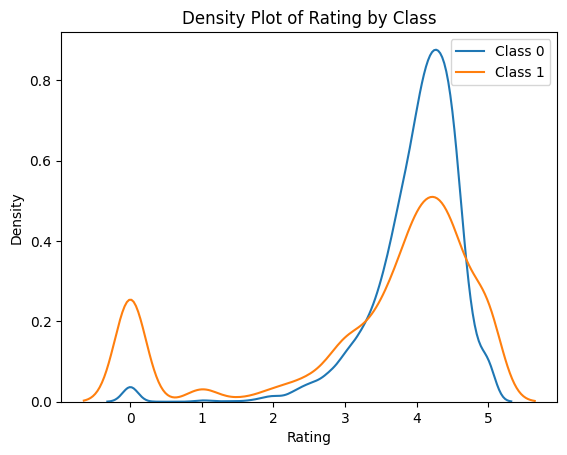

In [33]:
# Chart - 7 visualization code
# Density Plot: Rating by Class
sns.kdeplot(final_df[final_df['Class'] == 0]['Rating'], label='Class 0')
sns.kdeplot(final_df[final_df['Class'] == 1]['Rating'], label='Class 1')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.title('Density Plot of Rating by Class')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

A density plot is an excellent choice for visualizing the distribution of a continuous numerical variable. In this case, we want to understand the distribution of "Rating" for two classes: Benign and Malware.

##### 2. What is/are the insight(s) found from the chart?

**Overlapping Distributions**: Both classes exhibit similar distributions, with peaks around 4 and 5. This indicates that both benign and malware apps tend to receive similar ratings.

**Class Differences:** While the overall shapes are similar, there are subtle differences. The distribution for the Malware class seems to have a slightly higher peak around 4, suggesting that malware apps might receive slightly higher ratings on average.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 By analyzing the rating distribution for both classes, we can gain insights into user behavior and preferences. This information can be used to improve app development and marketing strategies.

#### Chart - 8 - **Distribution of Ratings over top 10 category**

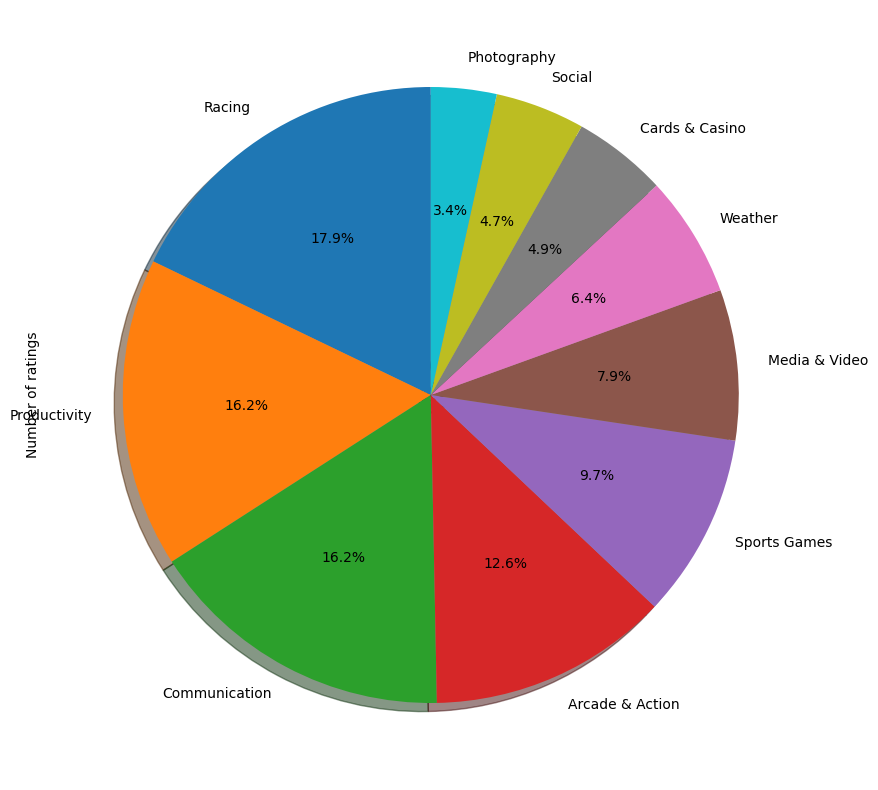

In [34]:
# Chart - 8 visualization code

# For Top 10 category only
final_df.groupby('Category')['Number of ratings'].median().sort_values(ascending=False).head(10).plot(kind='pie',
figsize=(20,10),autopct="%1.1f%%",startangle=90,shadow=True)
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart is an excellent choice for visualizing the distribution of categorical data. It clearly shows the proportion of each category relative to the whole. In this case, we want to understand the distribution of app categories based on the number of ratings. A pie chart provides a simple and effective way to visualize this.

##### 2. What is/are the insight(s) found from the chart?

* The chart reveals a significant difference in the number of ratings across various categories. "Racing", "Communication" and "Productivity" have the highest number of ratings, indicating their popularity.

* Categories like "Photography" and "Social" have a relatively low number of ratings, suggesting that they might be less popular or have a smaller user base.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* By understanding the distribution of ratings across categories, businesses can tailor their marketing strategies to target the most popular categories. This can help increase app visibility and downloads.

* Understanding the distribution of ratings can help app stores optimize their recommendations and search algorithms to improve user engagement and retention.

#### Chart - 9 - **Distribution of Catagories over Benign**

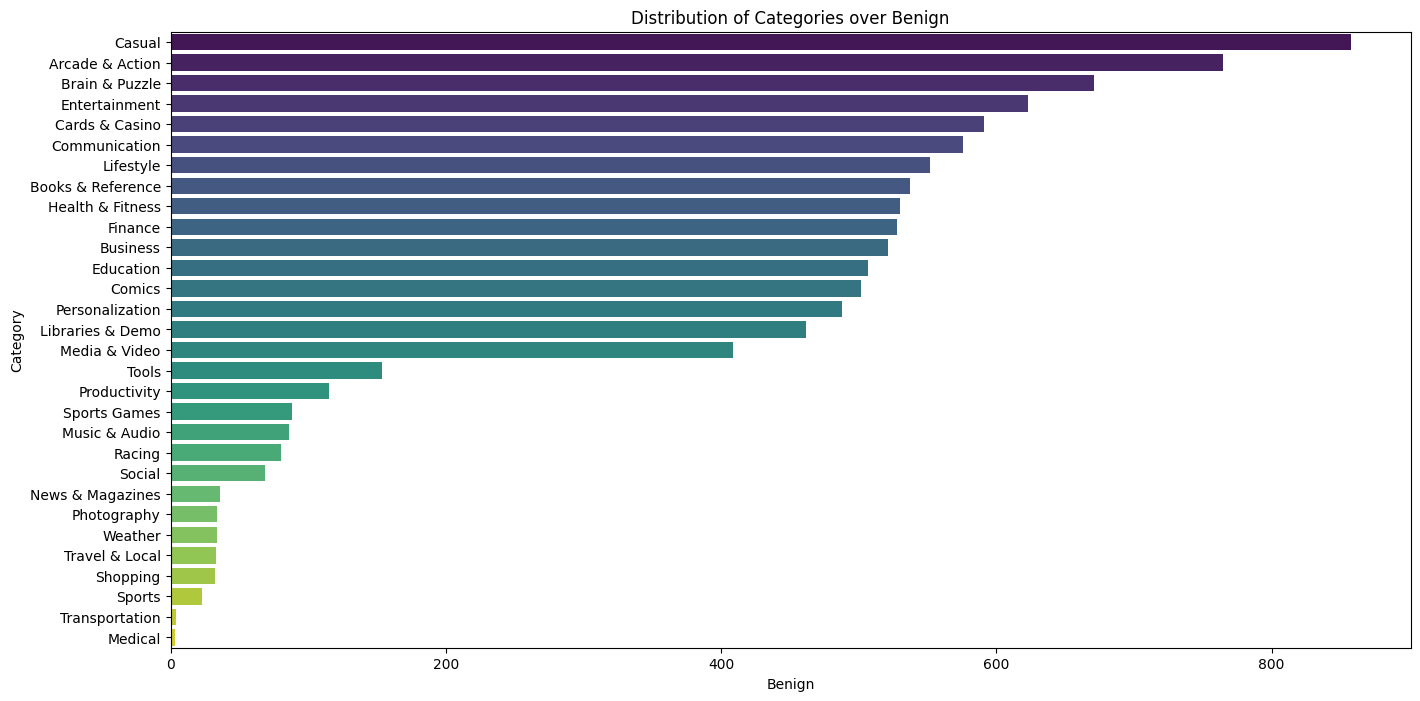

In [35]:
# Chart - 9 visualization code

cat_benign = final_df.groupby('Category')['Class'].apply(lambda x: (x==0).sum()).reset_index(name='Benign').sort_values('Benign', ascending=False)


plt.figure(figsize=(16,8))
sns.barplot(y="Category", x="Benign", data=cat_benign, palette="viridis")
plt.title("Distribution of Categories over Benign")
plt.show()


##### 1. Why did you pick the specific chart?

* A bar chart is an excellent choice for visualizing the distribution of categorical data. In this case, we want to compare the number of benign apps across different categories. A bar chart effectively represents the counts for each category using the length of the bars, making it easy to visually compare and identify categories with higher or lower numbers of benign apps.

##### 2. What is/are the insight(s) found from the chart?

* The chart clearly shows a significant variation in the number of benign apps across different categories. Some categories, like "Casual" and "Arcade & Action," have a considerably higher number of benign apps compared to others.

* The bars are arranged in ascending order based on the number of benign apps, providing a clear ranking of categories. This helps identify categories with the highest and lowest concentrations of benign apps.

* Also categories like "Tronsportation" and "Medical" hace a least number of benign apps compared to others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The insights can guide app developers and publishers to target categories with higher concentrations of benign apps, potentially increasing the chances of their apps being discovered and installed by users.

* App stores can leverage this information to acurate content and recommend apps to users based on their interests and preferences.

#### Chart - 10 - **Distribution of Categories over Malware**

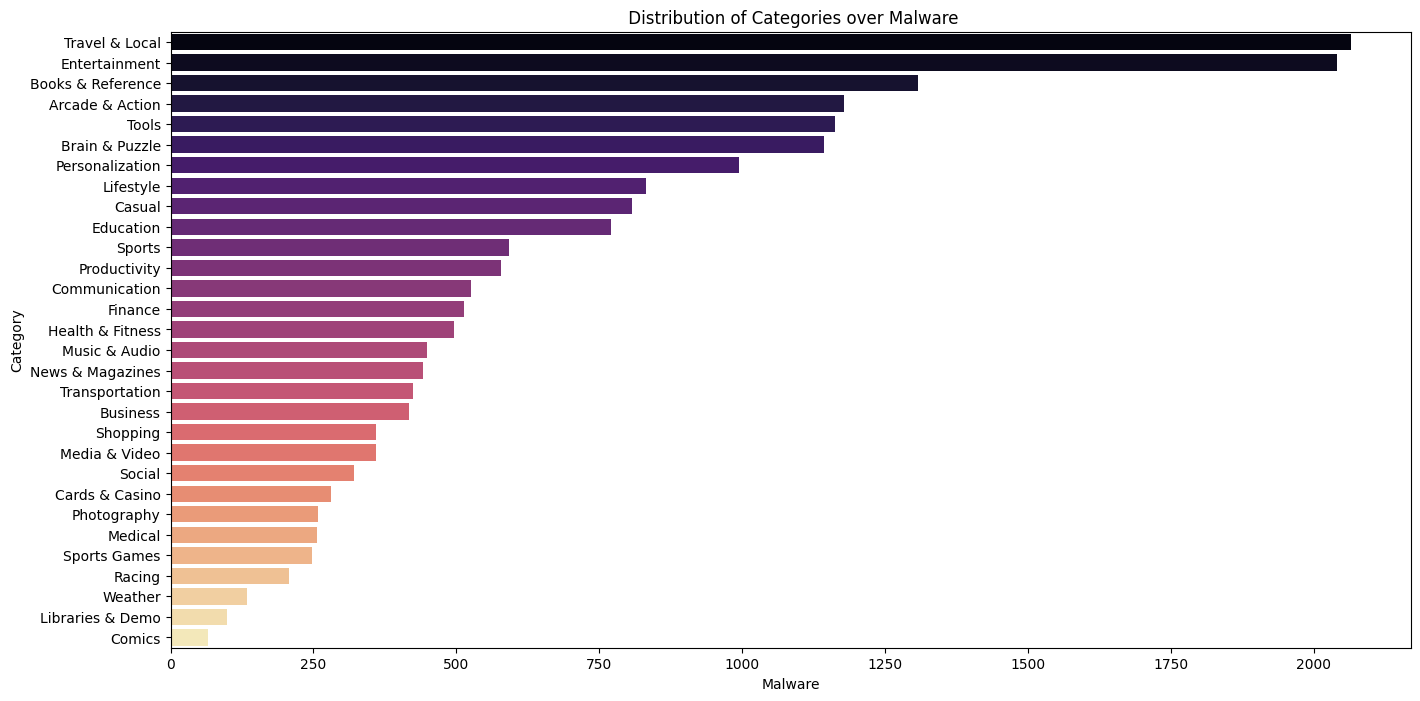

In [36]:
# Chart - 10 visualization code
cat_malware = final_df.groupby('Category')['Class'].apply(lambda x: (x==1).sum()).reset_index(name='Malware').sort_values('Malware', ascending=False)


plt.figure(figsize=(16,8))
sns.barplot(y="Category", x="Malware", data=cat_malware, palette = "magma")
plt.title(" Distribution of Categories over Malware")
plt.show()

##### 1. Why did you pick the specific chart?

* A bar chart is an excellent choice for visualizing the distribution of categorical data. In this case, we want to compare the number of benign apps across different categories. A bar chart effectively represents the counts for each category using the length of the bars, making it easy to visually compare and identify categories with higher or lower numbers of benign apps.

##### 2. What is/are the insight(s) found from the chart?

* The chart clearly shows a significant variation in the number of malware apps across different categories. Some categories, like "Travel & Local" and "Entertainment" have a considerably higher number of malware apps compared to others.

* The bars are arranged in ascending order based on the number of malware apps, providing a clear ranking of categories. This helps identify categories with the highest and lowest concentrations of malware apps.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The insights can help security researchers and app developers focus their attention on categories with higher malware occurrences. This allows for more targeted security measures and proactive threat mitigation.

* Developers can use this information to assess the potential risks associated with different app categories and take appropriate measures to enhance the security of their apps.

#### Chart - 11 - **Correlation Heatmap**

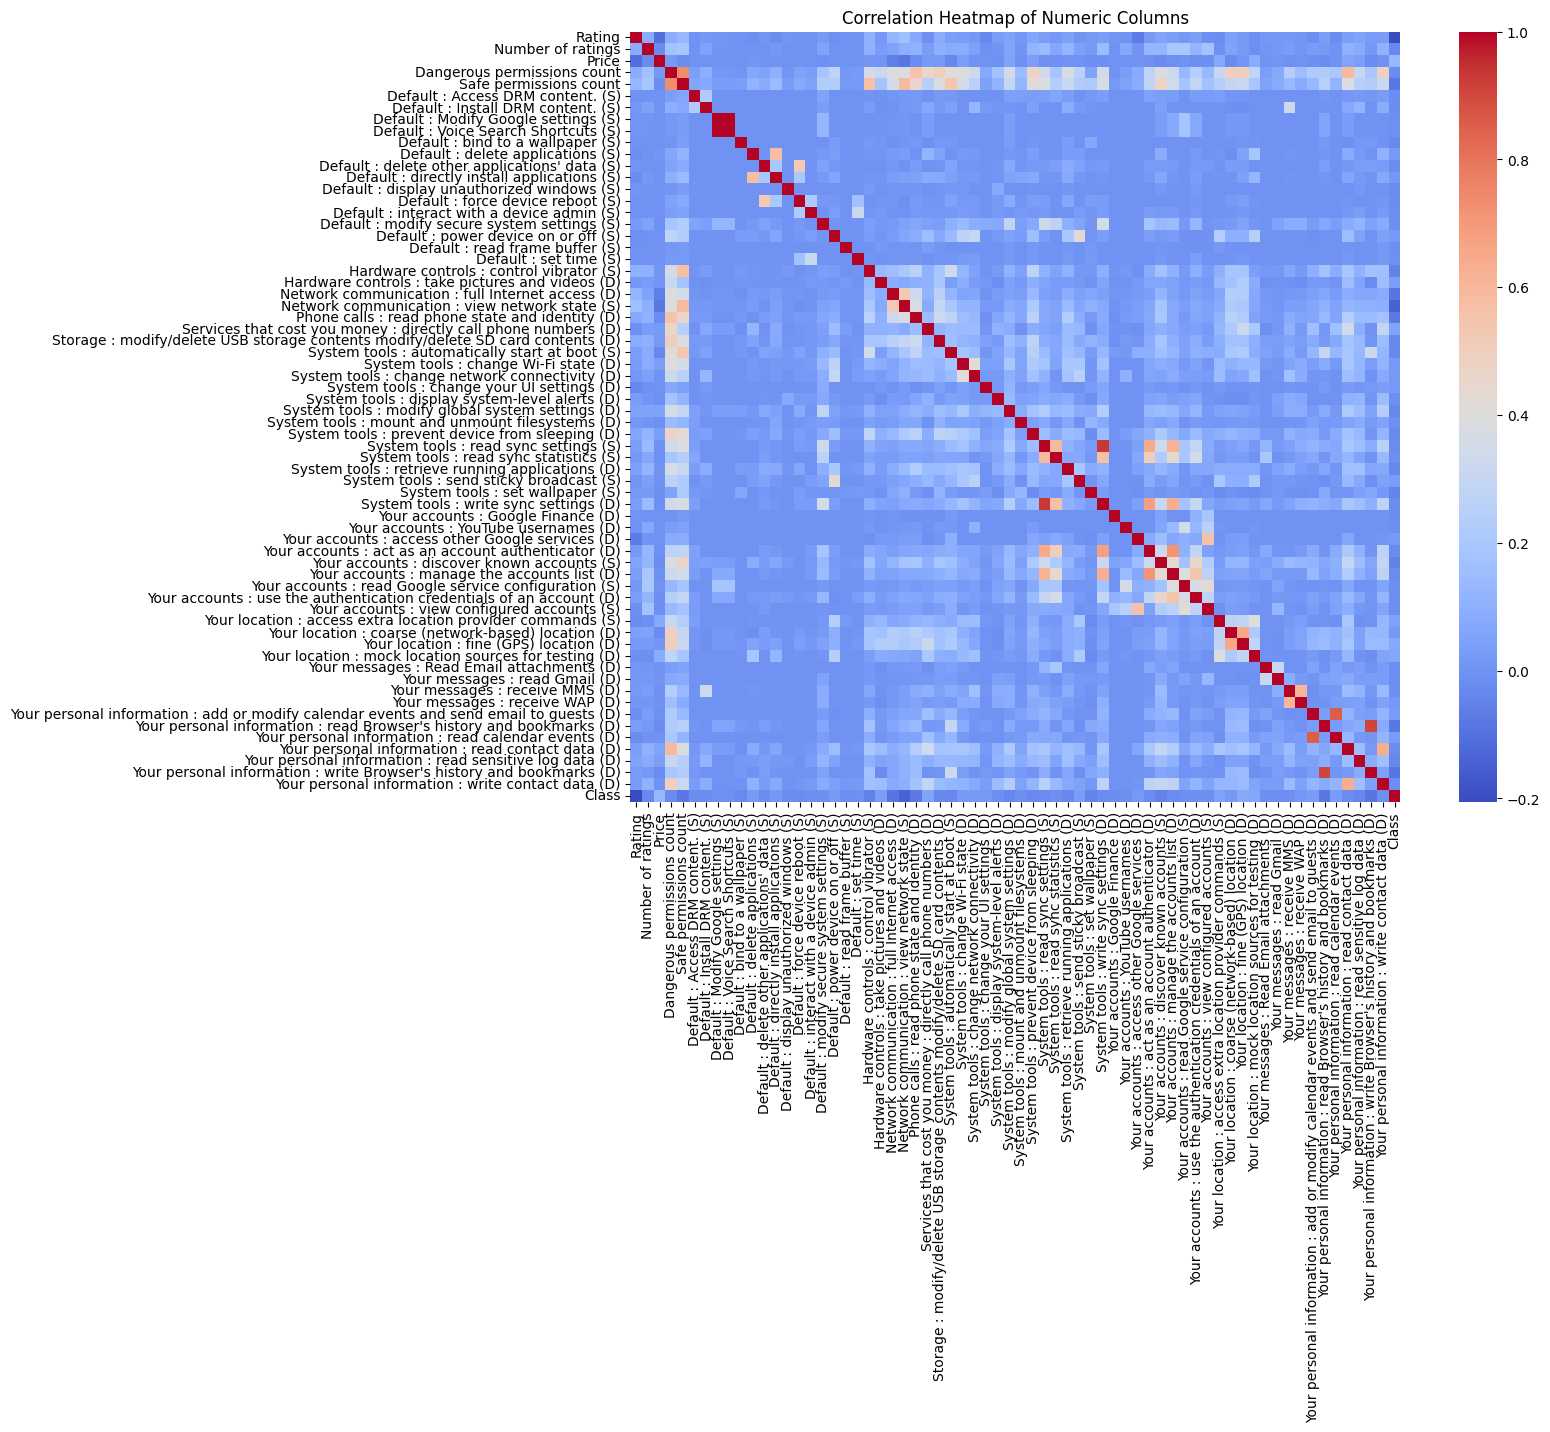

In [37]:
# Correlation Heatmap visualization code

# Select only numeric columns
numeric_cols = final_df.select_dtypes(include=[int, float]).columns

# Calculate the correlation matrix
corr_matrix = final_df[numeric_cols].corr()

# Create the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", square=True, xticklabels=numeric_cols, yticklabels=numeric_cols)
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap is an effective way to visualize the correlation between numerical variables. It helps identify relationships and dependencies between features, which is crucial for feature engineering, model selection, and understanding the underlying patterns in the data.

##### 2. What is/are the insight(s) found from the chart?

* The diagonal line of dark red squares represents perfect positive correlations between variables and themselves.

* There are several blocks of lighter red squares, indicating moderate positive correlations between certain features. These groups of features might be related to similar functionalities or permissions.

* The blue regions indicate negative correlations, suggesting that an increase in one feature is associated with a decrease in another. However, these negative correlations seem to be relatively weak.

#### Chart - 12 - **Pair Plot**

In [38]:
# # Pair Plot visualization code
# pair_plotdf = final_df.iloc[:,:10]
# # Create a pair plot
# sns.pairplot(pair_plotdf)
# # Display the plot
# plt.show()

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Thus, we used pair plot to analyse the patterns of data and realationship between the first 10 important features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we got to know, there are less linear relationship between variables and data points aren't linearly separable. some data is clusetered and ovearlapped each other. Dangerous Permission Count and Safe Permission Count has slightly linear realtionship. Rest insights can be depicted from the above graph.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1 : The Safe permissions is a significant predictor of an App's authenticity.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* **Null hypothesis:** The app's rating is not significantly related to its authenticity.
* **Alternative hypothesis:** The app's rating is significantly related to its authenticity.

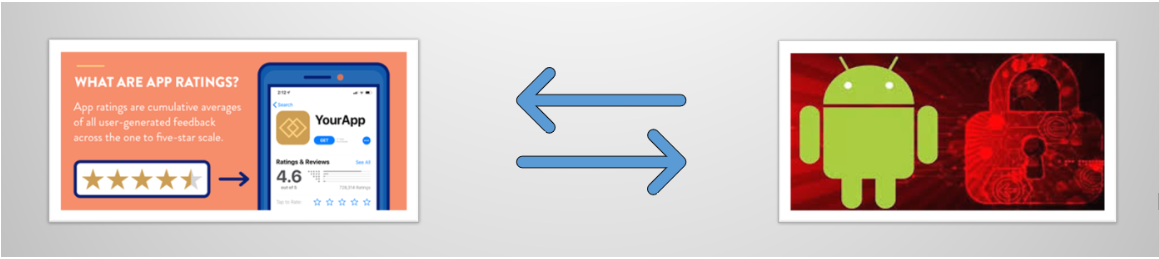




#### 2. Perform an appropriate statistical test.

In [39]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind, chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(final_df['Safe permissions count'], final_df['Class'])

# Perform the Chi-Square Test to obtain P-Value
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degree of Freedom: {dof}")
print(f"Expected: {expected}")

Chi-Square Statistic: 504.7779233843646
P-value: 5.514119494233876e-98
Degree of Freedom: 15
Expected: [[3.22073605e+03 6.28126395e+03]
 [3.26174942e+03 6.36125058e+03]
 [1.72696802e+03 3.36803198e+03]
 [8.84668605e+02 1.72533140e+03]
 [4.11150581e+02 8.01849419e+02]
 [1.72527326e+02 3.36472674e+02]
 [1.10498837e+02 2.15501163e+02]
 [5.08430233e+01 9.91569767e+01]
 [2.88110465e+01 5.61889535e+01]
 [1.89813953e+01 3.70186047e+01]
 [1.18633721e+01 2.31366279e+01]
 [6.10116279e+00 1.18988372e+01]
 [4.40639535e+00 8.59360465e+00]
 [3.38953488e-01 6.61046512e-01]
 [6.77906977e-01 1.32209302e+00]
 [6.77906977e-01 1.32209302e+00]]


##### Which statistical test have you done to obtain P-Value?

Chi- Square Test

##### Why did you choose the specific statistical test?

Its helps to determine if the distribution of one categorical variable is independent of another, which is crucial for understanding feature relevence in classification tasks.

### Hypothetical Statement - 2 : The App categories are  significant predictor of its authenticity.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* **Null hypothesis:** The app's category is not significantly related to its authenticity.
* **Alternative hypothesis:** The app's category is significantly related to its authenticity.

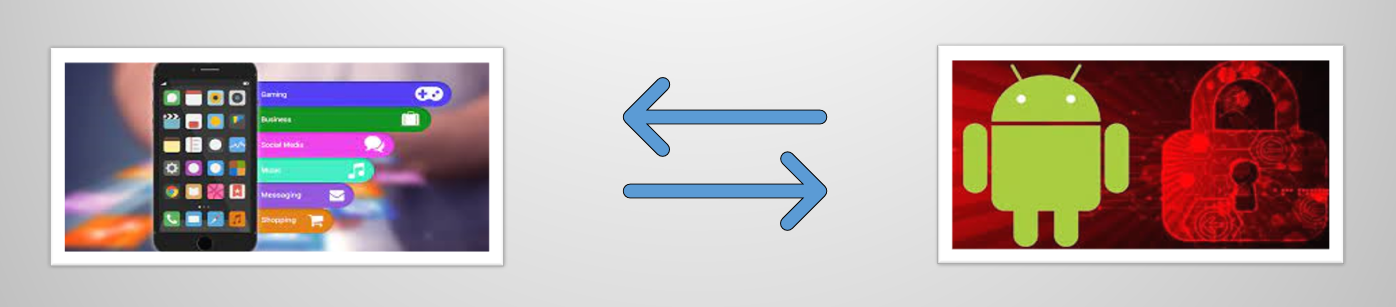

#### 2. Perform an appropriate statistical test.

In [40]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats
# Create a contingency table of observed frequencies
cont_table = pd.crosstab(final_df['Class'], final_df['Category'])

# Conduct the chi-square test
chi_stat, p_val, dof, expected = stats.chi2_contingency(cont_table)

print("Chi-square statistic:", chi_stat)
print("Degrees of freedom:", dof)
print("p-value:", p_val)

Chi-square statistic: 5432.90581734701
Degrees of freedom: 29
p-value: 0.0


##### Which statistical test have you done to obtain P-Value?

* The chi-square statistic measures the difference between the observed and expected frequencies in each cell of the contingency table. In this case, the large chi-square statistic indicates a significant difference between the observed and expected frequencies, suggesting that there is a relationship between app category and authenticity.

* The degrees of freedom represent the number of independent observations in the contingency table. In this case, the degrees of freedom is 29, which is the number of categories minus one, multiplied by the number of authenticity levels minus one.

* The p-value is the probability of observing the relationship between app category and authenticity, or a more extreme relationship, assuming that there is no relationship between the two variables (i.e., the null hypothesis). A p-value of 0.0 indicates that the probability of observing the relationship or a more extreme relationship by chance is essentially zero. Therefore, we reject the null hypothesis and conclude that there is a statistically significant relationship between app category and authenticity.

* In summary, the output suggests that the app's category is a significant predictor of its authenticity, and there is a significant relationship between app category and authenticity.




##### Why did you choose the specific statistical test?

The Chi-Square Test is well-suited for testing this hypothesis. It checks whether the observed frequencies in the contingency table differ significantly from the frequencies that would be expected if the two variables were independent.

### Hypothetical Statement - 3 : The number of reviews is a significant predictor of an App's authenticity.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* **Null hypothesis:** The number of reviews is not significantly related to an app's authenticity.
* **Alternative hypothesis:** The number of reviews is significantly related to an app's authenticity



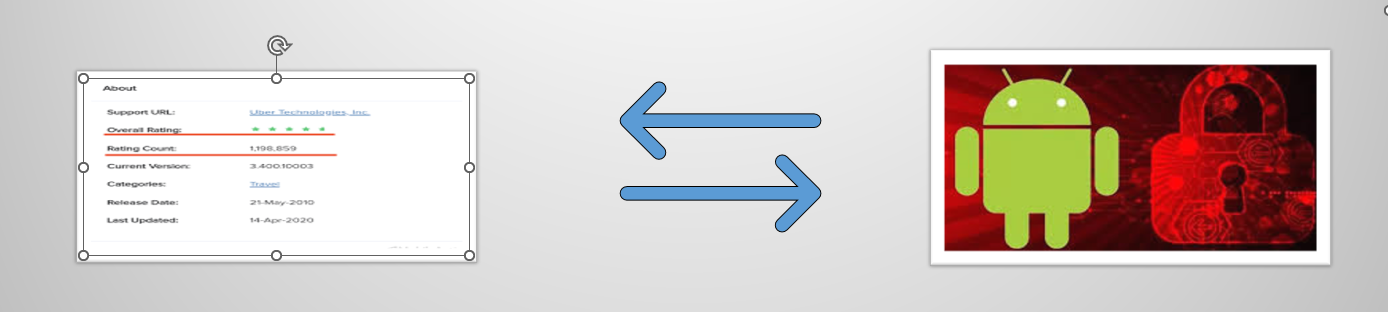

#### 2. Perform an appropriate statistical test.

In [41]:
# Perform Statistical Test to obtain P-Value

# Define the contingency table
contingency_table = pd.crosstab(final_df['Class'], final_df['Number of ratings'])

# Conduct the chi-square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print('Chi-square statistic:', chi2)
print('Degrees of freedom:', dof)
print('p-value:', p_value)


Chi-square statistic: 11965.32339831074
Degrees of freedom: 5298
p-value: 0.0


##### Which statistical test have you done to obtain P-Value?

Chi-Square statistic

##### Why did you choose the specific statistical test?

The result of the chi-square test in the code provided indicates that the p-value is 0.0, which is less than the typical significance level of 0.05. This means that we reject the null hypothesis that the number of ratings is not significantly related to the Class of the app and conclude that there is a significant relationship between the number of ratings and the Class of the app.

The chi-square statistic is a measure of how different the observed values are from the expected values under the null hypothesis. In this case, the observed values are the contingency table of the number of ratings and Class, and the expected values are calculated assuming the null hypothesis is true. The degrees of freedom tell us how many values can vary freely in the chi-square distribution. The large chi-square statistic and degrees of freedom indicate that there are many categories with large differences between the observed and expected values, supporting the conclusion of a significant relationship between the number of ratings and the Class of the app.





### Hypothetical Statement - 4 : THE APP'S RATING IS A SIGNIFICANT RELATED TO ITS AUTHENTICITY

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* **Null hypothesis:** The App's Rating is not significantly related to its authenticity.
* **Alternative hypothesis:** The App's rating is significantly related to its authenticity.

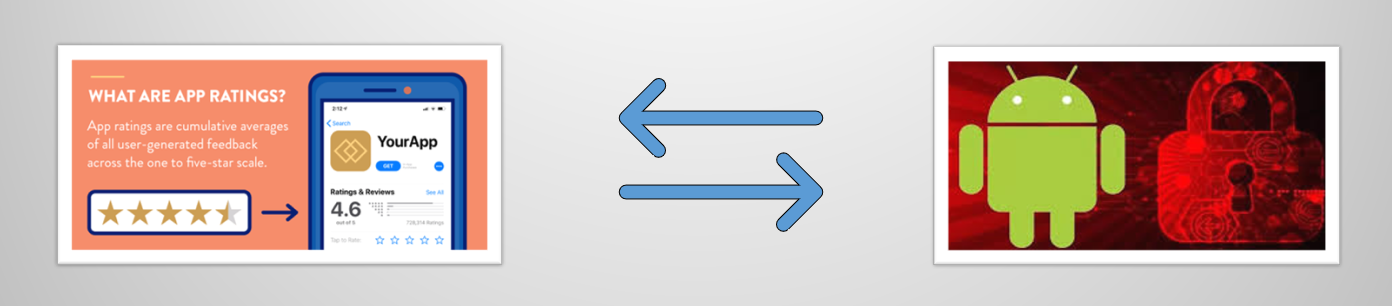

#### 2. Perform an appropriate statistical test.

In [42]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# Separate the ratings into two groups based on Class
authentic_ratings = final_df[final_df['Class'] == 1]['Rating']
fake_ratings = final_df[final_df['Class'] == 0]['Rating']

# Test assumptions
# Check if the variances of the two groups are equal
var_equal = stats.levene(authentic_ratings, fake_ratings)[1] > 0.05
# Check if the df follows a normal distribution
normal_dist = stats.shapiro(final_df['Rating'])[1] > 0.05

# Conduct the t-test
if var_equal and normal_dist:
    t_stat, p_val = stats.ttest_ind(authentic_ratings, fake_ratings, equal_var=True)
else:
    t_stat, p_val = stats.ttest_ind(authentic_ratings, fake_ratings, equal_var=False)

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_val)

t-statistic: -44.75616657254063
p-value: 0.0


##### Which statistical test have you done to obtain P-Value?

Chi-Square statistic

##### Why did you choose the specific statistical test?

The t-statistic represents the difference between the means of the two groups (authentic and fake app ratings) relative to the variability in the data. In this case, the negative t-statistic value indicates that the mean rating of the fake apps is lower than the mean rating of the authentic apps.

The p-value is the probability of observing the difference in mean ratings between the authentic and fake apps, or a more extreme difference, assuming that the null hypothesis (that there is no significant relationship between app rating and authenticity) is true. A p-value of 0.0 means that the probability of observing the difference in mean ratings or more extreme differences is extremely low, virtually zero. Therefore, we reject the null hypothesis and conclude that there is a statistically significant relationship between app rating and authenticity.

In summary, the output suggests that the app's rating is a significant predictor of its authenticity, and the mean rating of authentic apps is significantly higher than that of fake apps.





## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [43]:
# Handling Missing Values and Imputation it.
null_counts = final_df.isnull().sum()
if null_counts.any() > 0:
    for column, null_count in null_counts.items():
        if null_count > 0:
            print(f"Column '{column}' has {null_count} null values.")
else:
    print("No null values found in the dataset.")

No null values found in the dataset.


In [44]:
# checking info of the dataset
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29240 entries, 0 to 29998
Data columns (total 71 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   Rating                                                                                  29240 non-null  float64
 1   Number of ratings                                                                       29240 non-null  int64  
 2   Price                                                                                   29240 non-null  float64
 3   Dangerous permissions count                                                             29240 non-null  float64
 4   Safe permissions count                                                                  29240 non-null  int64  
 5   Default : Access DRM content. (S)                                       

In [45]:
#list of column names that are categorical
categorical_columns = final_df.select_dtypes(include=['object']).columns.tolist()

print(categorical_columns)

['App', 'Package', 'Category', 'Description', 'Related apps']


In [46]:
# Drop Package column as it is not required
final_df = final_df.drop(['Package'], axis=1)

In [47]:
#list of column names that are categorical after removing Package column
categorical_columns = final_df.select_dtypes(include=['object']).columns.tolist()

print(categorical_columns)

['App', 'Category', 'Description', 'Related apps']


#### What all missing value imputation techniques have you used and why did you use those techniques?

Generally, there are two approach to handle missing values **Deleting & Imputing with other values**

* Here we use Deleting method for the column name "Package" because it's no longer need to build Machine learning model.

* Also we already handled with some more missing value columns like 'App','Dangerous permissions count','Description','Related apps'

### 2. Handling Outliers

In [48]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [49]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00


In [50]:
from sklearn.preprocessing import StandardScaler
import category_encoders as ce

# scale numeric columns using StandardScaler
numerical_columns = final_df.drop('Class', axis=1).select_dtypes(include=['number']).columns.tolist()
scaler = StandardScaler()
final_df[numerical_columns] = scaler.fit_transform(final_df[numerical_columns])

# Encode your categorical columns
target_encoder = ce.TargetEncoder(cols=categorical_columns)
final_df_encoded = target_encoder.fit_transform(final_df, final_df['Class'])

In [51]:
# Showing dataset after encoding
final_df_encoded.head()

,Rating,Number of ratings,Price,Dangerous permissions count,Safe permissions count,Default : Access DRM content. (S),Default : Install DRM content. (S),Default : Modify Google settings (S),Default : Voice Search Shortcuts (S),Default : bind to a wallpaper (S),Default : delete applications (S),Default : delete other applications' data (S),Default : directly install applications (S),Default : display unauthorized windows (S),Default : force device reboot (S),Default : interact with a device admin (S),Default : modify secure system settings (S),Default : power device on or off (S),Default : read frame buffer (S),Default : set time (S),Hardware controls : control vibrator (S),Hardware controls : take pictures and videos (D),Network communication : full Internet access (D),Network communication : view network state (S),Phone calls : read phone state and identity (D),Services that cost you money : directly call phone numbers (D),Storage : modify/delete USB storage contents modify/delete SD card contents (D),System tools : automatically start at boot (S),System tools : change Wi-Fi state (D),System tools : change network connectivity (D),System tools : change your UI settings (D),System tools : display system-level alerts (D),System tools : modify global system settings (D),System tools : mount and unmount filesystems (D),System tools : prevent device from sleeping (D),System tools : read sync settings (S),System tools : read sync statistics (S),System tools : retrieve running applications (D),System tools : send sticky broadcast (S),System tools : set wallpaper (S),System tools : write sync settings (D),Your accounts : Google Finance (D),Your accounts : YouTube usernames (D),Your accounts : access other Google services (D),Your accounts : act as an account authenticator (D),Your accounts : discover known accounts (S),Your accounts : manage the accounts list (D),Your accounts : read Google service configuration (S),Your accounts : use the authentication credentials of an account (D),Your accounts : view configured accounts (S),Your location : access extra location provider commands (S),Your location : coarse (network-based) location (D),Your location : fine (GPS) location (D),Your location : mock location sources for testing (D),Your messages : Read Email attachments (D),Your messages : read Gmail (D),Your messages : receive MMS (D),Your messages : receive WAP (D),Your personal information : add or modify calendar events and send email to guests (D),Your personal information : read Browser's history and bookmarks (D),Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),App,Category,Description,Related apps,Class
0,-0.365499,-0.149199,-0.181443,1.262883,-0.240454,-0.017547,-0.026162,-0.008271,-0.008271,-0.026809,-0.045722,-0.026809,-0.070104,-0.013078,-0.024119,-0.013078,-0.068862,-0.080873,-0.011697,-0.008271,-0.55354,-0.275517,0.466664,0.865455,-0.773806,3.330561,1.224570,-0.326514,-0.175118,-0.141756,-0.071567,-0.102157,-0.213874,9.723968,-0.508376,-0.10026,-0.062009,-0.234248,-0.096179,-0.191753,-0.0969,-0.013078,-0.017547,-0.038821,-0.084026,-0.259365,-0.111176,-0.044582,-0.120428,-0.069112,-0.151256,-0.521983,1.893850,-0.150188,-0.031508,-0.038376,-0.068106,-0.043805,-0.118958,-0.143504,-0.122888,3.202313,-0.157411,-0.130821,4.865707,0.575039,0.445154,0.575039,0.575039,0
1,0.518860,-0.146546,-0.181443,-0.040600,0.412548,-0.017547,-0.026162,-0.008271,-0.008271,-0.026809,-0.045722,-0.026809,-0.070104,-0.013078,-0.024119,-0.013078,-0.068862,-0.080873,-0.011697,-0.008271,-0.55354,-0.275517,0.466664,0.865455,1.292314,-0.300250,1.224570,-0.326514,-0.175118,-0.141756,-0.071567,-0.102157,-0.213874,-0.102839,-0.508376,-0.10026,-0.062009,-0.234248,-0.096179,-0.191753,-0.0969,-0.013078,-0.017547,-0.038821,-0.084026,3

In [52]:
# Checking the shape of the dataset after encoding:
final_df_encoded.shape

(29240, 70)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Here we are using **category_encoders**  technique used to represent categorical variables as numerical values in a machine learning model. As the category column in our dataset is more important feature for evalution, we have to convert it into numerical variable  for model implementation so we have used this technique.
The advantages of using category_encoders includes:
* It allows the use of categorical variables in models that require numerical input.
* It can improve model performance by providing more information to the model about the categorical variable.
* It can help to avoid the problem of ordinality, which can occur when a categorical variable has a natural ordering (e.g. “small”, “medium”, “large”).



### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

#### 2. Lower Casing

#### 3. Removing Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

#### 5. Removing Stopwords & Removing White spaces

#### 6. Rephrase Text

#### 7. Remove Special Characters

#### 8. Text Normalization

##### Which text normalization technique have you used and why?

#### 9. Part of speech tagging

In [53]:
# POS Taging for app column

#### 10. Text Vectorization

##### Which text vectorization technique have you used and why?

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [54]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [55]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [56]:
# Transform Your data

### 6. Data Scaling

In [57]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

In [58]:
Android_df = final_df_encoded.copy()

In [59]:
X = Android_df.drop(['Class'],axis=1)
Y = Android_df['Class']

In [60]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA

# perform PCA on the concatenated data
pca = PCA(n_components=0.95)  # retain 95% of the variance
pca_data = pca.fit_transform(Android_df)

In [61]:
Android_df.shape

(29240, 70)

In [62]:
pca_data.shape

(29240, 51)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I use **PCA(Principal Component Analysis)** to reduce the dimensionality of the  dataset and here i gave specifies parameter that PCA should retain 95% of the variance in the data.

Here's why,

  * PCA is often used as a general-purpose dimensionality reduction technique.

  * Retaining a specific percentage of variance (95% in this case) is a common goal when using PCA to reduce the number of features while preserving most of the information.

  * PCA is a good method to use when the data is linear, and you wish to reduce noise, or speed up processing.

### 8. Data Splitting

In [63]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(pca_data, Android_df['Class'], test_size=0.2, random_state=42)

##### What data splitting ratio have you used and why?

* I used an 80:20 data splitting ratio. This means that 80% of the dataset was allocated for training the model, while the remaining 20% was reserved for testing its performance.

* This ratio is a common and generally effective choice for many machine learning tasks. It provides a sufficiently large training set for the model to learn patterns and relationships within the data while maintaining a substantial testing set to obtain a reliable evaluation of its generalization ability.

* The 80:20 split allows for a good balance between model training and evaluation, enabling the model to learn effectively from a significant portion of the data while still providing a sufficient number of unseen samples to assess its performance on new, unseen data."

### 9. Handling Imbalanced Dataset

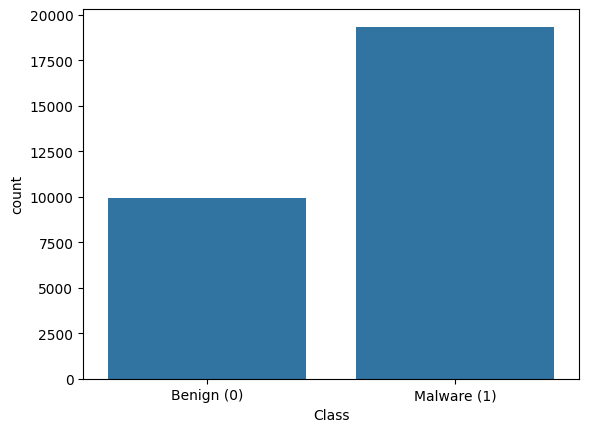

In [64]:
# Visualizing the dependent variable
ax = sns.countplot(x=Android_df["Class"])
ax.set_xticklabels(['Benign (0)','Malware (1)'])
plt.show()

##### Do you think the dataset is imbalanced? Explain Why.

Yes handling data imbalanced is definently mandatory here because in the class there is huge imbalanced between the data itself.

Here:-

	Malware is 66.1%

	Benign is 33.9%

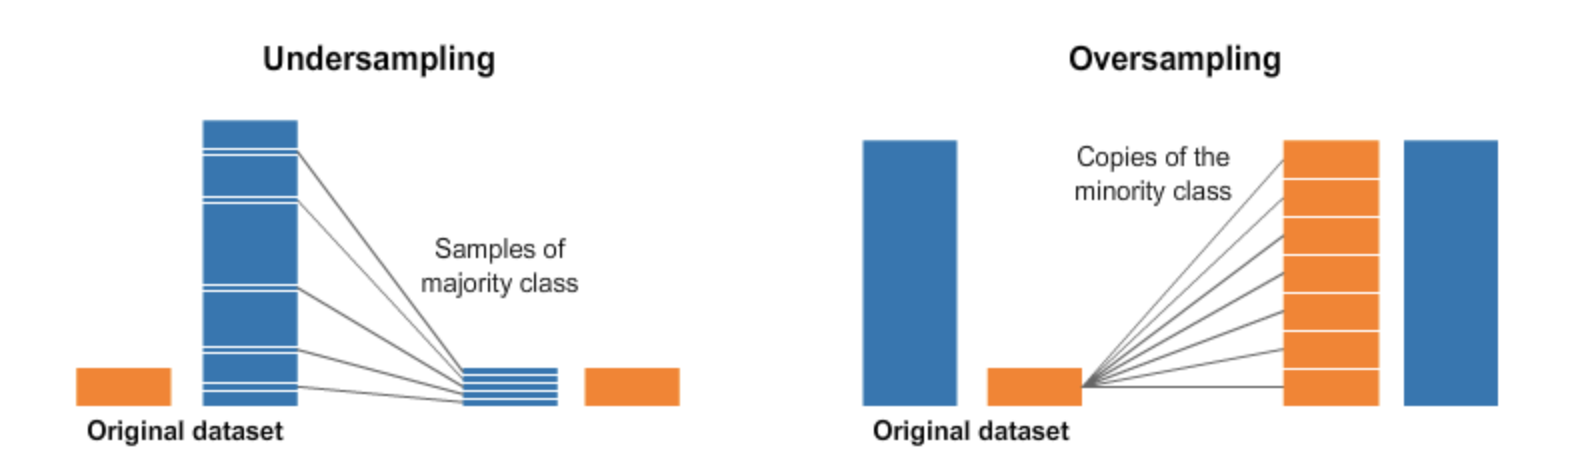

In [65]:
# Handling Imbalanced Data
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res	, y_train_res = smote.fit_resample(X_train, y_train)

In [66]:
print('Original dataset shape', Android_df.shape)
print('Resampled dataset shape', X_train_res.shape, y_train_res.shape)

Original dataset shape (29240, 70)
Resampled dataset shape (30968, 51) (30968,)


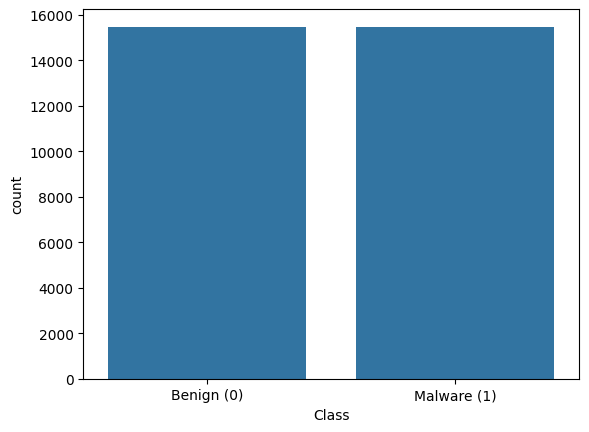

In [67]:
# Visualizing the dependent variable after SMOTE
ax = sns.countplot(x=y_train_res)
ax.set_xticklabels(['Benign (0)','Malware (1)'])
plt.show()


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

* SMOTE was chosen because it effectively addresses class imbalance while maintaining data diversity and avoiding the potential pitfalls of simple oversampling techniques.

* SMOTE is an oversampling method that addresses the limitations of simple oversampling techniques (like duplicating minority class instances). It works by synthesizing new instances of the minority class instead of merely replicating existing ones.

* The synthetic instances are generated by interpolating between existing minority class samples, which helps to increase the diversity and representativeness of the minority class in the feature space.

## ***7. ML Model Implementation***

### ML Model - 1 LOGISTIC REGRESSION

In [68]:
# ML Model - 1 	Implement a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a Logistic Regression model
log_reg = LogisticRegression()

# Fit the model on the training data
log_reg.fit(X_train_res, y_train_res)

# Predict the target variable on the test data
y_pred = log_reg.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)



Accuracy: 0.9252735978112175


In [69]:
# Creating Dataframe with actual and predicted values
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df.head(10)

,Actual,Predicted
13986,1,1
992,1,1
26336,1,1
1452,1,1
16405,1,1
9834,1,1
12430,0,0
12936,0,0
22295,1,1
5617,0,0


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

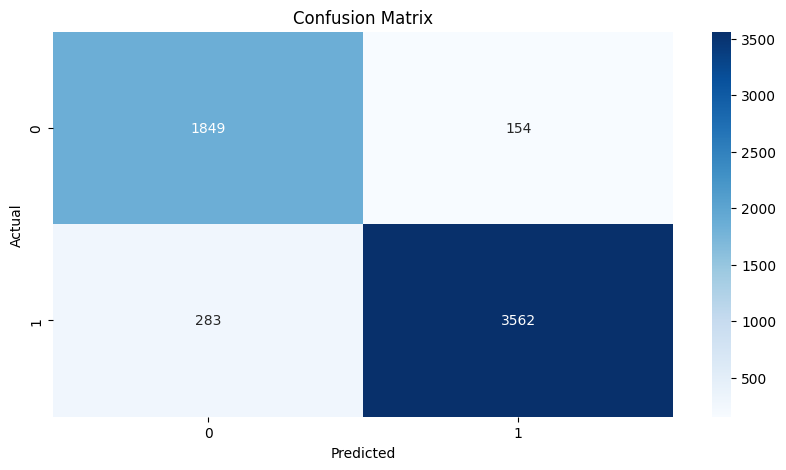

In [70]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [71]:
# Precision, Recall, F1-Score using classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      2003
           1       0.96      0.93      0.94      3845

    accuracy                           0.93      5848
   macro avg       0.91      0.92      0.92      5848
weighted avg       0.93      0.93      0.93      5848



In [72]:
# Accuracy Score of training and testing data
print("Training Accuracy :", log_reg.score(X_train_res, y_train_res))
print("Testing Accuracy :", log_reg.score(X_test, y_test))



Training Accuracy : 0.9269245672952725
Testing Accuracy : 0.9252735978112175


In [73]:
# AUC_ROC_Curve of test data
auc_score = roc_auc_score(y_test,y_pred)
print('roc_auc_score:', auc_score)

loss = log_loss(y_test, y_pred)
print('The LogLoss is:', loss)


roc_auc_score: 0.9247566231926493
The LogLoss is: 2.6934125395082416


#### 2. Cross- Validation & Hyperparameter Tuning

In [74]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
# Create the GridSearchCV object
grid_search = GridSearchCV(log_reg, param_grid, cv=5)

# Fit the model on the training data
grid_search.fit(X_train_res, y_train_res)

# Get the best hyperparameters
best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)

# Predict the target variable on the test data
y_pred = grid_search.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Creating Dataframe with actual and predicted values
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df.head(10)



Best hyperparameters: {'C': 100}
Accuracy: 0.945280437756498


,Actual,Predicted
13986,1,1
992,1,1
26336,1,1
1452,1,1
16405,1,1
9834,1,1
12430,0,0
12936,0,0
22295,1,1
5617,0,0


In [75]:
# AUC_ROC_Curve after hyperparameter optimization
auc_score = roc_auc_score(y_test,y_pred)
print('roc_auc_score:', auc_score)


roc_auc_score: 0.9455917554097981


##### Which hyperparameter optimization technique have you used and why?

"I used GridSearchCV for hyperparameter tuning.

GridSearchCV is a powerful technique that systematically explores a predefined set of hyperparameter values. It exhaustively evaluates all possible combinations within the specified grid, allowing for a thorough search of the hyperparameter space.

This method is valuable because:

> Comprehensive Search: It ensures that no promising hyperparameter combinations are overlooked within the defined grid.

> Systematic Approach: It provides a structured and reproducible way to find the best hyperparameters.

> Cross-validation Integration: GridSearchCV often incorporates cross-validation to evaluate the model's performance on different subsets of the data, providing a more robust estimate of its performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We have used Logistic Regression here to predict the estimated likelihood that an individual app is Benign or Malware. We have applied Logistic Regression here with hyper-parameter tuning and try to evaluate our result by using some different type of evalution metrices i.e. Precision, Recall, F1-Score, Accuracy Score, AUC-ROC Curve. Finally, We have found the test score **accuracy of 92.52% and aucroc score of 92.48%**. After apply cross validation and hyper-parameter tuning, we have found our accuracy and aucroc score of test data with **94.53% and 94.56%** respectively which is average in the term of good optimized model.

### ML Model - 2 DECISION TREE CLASSIFIER

In [76]:
# Creating Instance of the Decision Tree Classifier
dt = DecisionTreeClassifier()

# Fitting the model on the training data
dt.fit(X_train_res, y_train_res)


DecisionTreeClassifier()

In [77]:
# Predict model with test data
y_pred = dt.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Auc_Roc_Score of test data
auc_score = roc_auc_score(y_test,y_pred)
print('roc_auc_score:', auc_score)

# Creating Dataframe with actual and predicted values
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df.head(10)

Accuracy: 0.8984268125854993
roc_auc_score: 0.8885550737612695


,Actual,Predicted
13986,1,1
992,1,1
26336,1,1
1452,1,1
16405,1,1
9834,1,1
12430,0,0
12936,0,0
22295,1,1
5617,0,0


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

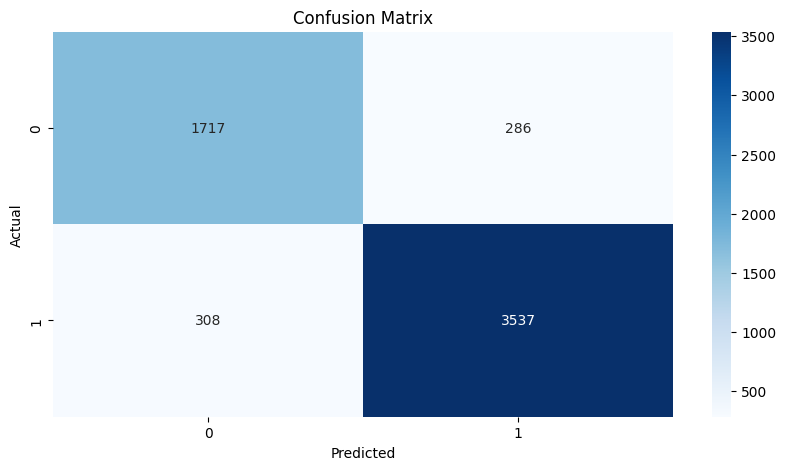

In [78]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [79]:
# Precision, Recall, F1-Score using classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.85      0.86      0.85      2003
           1       0.93      0.92      0.92      3845

    accuracy                           0.90      5848
   macro avg       0.89      0.89      0.89      5848
weighted avg       0.90      0.90      0.90      5848



#### 2. Cross- Validation & Hyperparameter Tuning

In [80]:
# ML Model - 1 Implementation with hyperparameter optimization techniques i.e. RandomSearch CV
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameters to tune
param_dist = {'max_depth': [3, None],
			  'min_samples_split': [2, 5, 10],
			  'min_samples_leaf': [1, 2, 4],
			  'criterion': ['gini', 'entropy']}
# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(dt, param_dist, cv=5)

# Fit the model on the training data
random_search.fit(X_train_res, y_train_res)

# Get the best hyperparameters
best_params = random_search.best_params_
print('Best hyperparameters:', best_params)

# Predict the target variable on the test data
y_pred = random_search.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# AUC_ROC_Curve after hyperparameter optimization
auc_score = roc_auc_score(y_test,y_pred)
print('roc_auc_score:', auc_score)

# Creating Dataframe with actual and predicted values
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df.head(10)

Best hyperparameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'gini'}
Accuracy: 0.9001367989056087
roc_auc_score: 0.8900946369782128


,Actual,Predicted
13986,1,1
992,1,1
26336,1,1
1452,1,1
16405,1,1
9834,1,1
12430,0,0
12936,0,0
22295,1,1
5617,0,0


##### Which hyperparameter optimization technique have you used and why?

I used Random Search CV for hyperparameter tuning.

* Random Search CV explores a wider range of hyperparameter combinations compared to Grid Search, which can be computationally expensive, especially with a large number of hyperparameters.Random Search often finds good solutions more efficiently than Grid Search, making it a suitable choice for initial exploration of the hyperparameter space.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


"The impact of imputation on model performance was observed to be minimal. **Accuracy and ROC score** exhibited negligible decreases, with accuracy changing from **89.91% to 89.55%** and the ROC score from **89.01% to 88.80%**. This indicates that the imputation method had a near-neutral effect on the model's predictive capabilities."

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

* Measures the overall correctness of the model's predictions. A higher accuracy generally implies better overall performance.In many applications, higher accuracy directly translates to better decision-making. For example, in a fraud detection system, higher accuracy means fewer false alarms and more accurate identification of fraudulent activities.

* Measures the model's ability to distinguish between positive and negative classes. A higher ROC score indicates better discrimination ability. In applications like customer churn prediction, a higher ROC score can help identify customers at high risk of churn more accurately, allowing businesses to proactively intervene and retain them.

### ML Model - 3 RANDOM FOREST CLASSIFIER

In [97]:
# ML Model - 3 Implementation of Random Forest Classifier
rdf = RandomForestClassifier()

# Fitting the model on the training data
rdf.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [98]:
# Predict model with test data
y_pred = rdf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Auc_Roc_Score of test data
auc_score = roc_auc_score(y_test,y_pred)
print('roc_auc_score:', auc_score)

# Creating Dataframe with actual and predicted values
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df.head(10)


Accuracy: 0.9107387140902873
roc_auc_score: 0.8970807767542444


,Actual,Predicted
13986,1,1
992,1,1
26336,1,1
1452,1,1
16405,1,1
9834,1,1
12430,0,0
12936,0,0
22295,1,1
5617,0,1


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

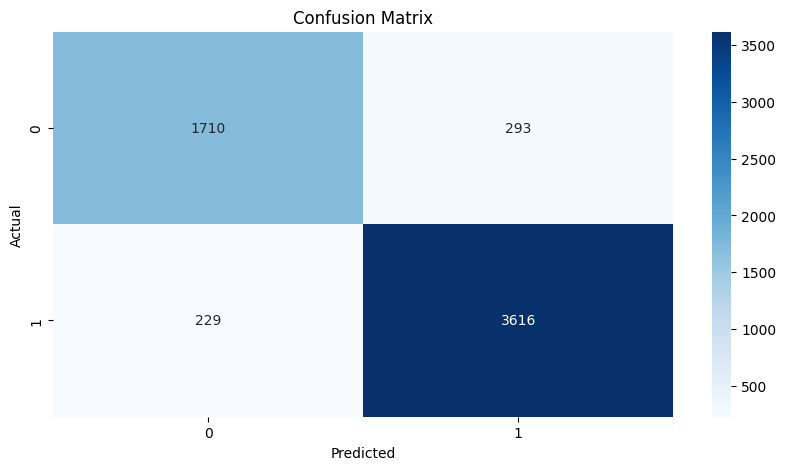

In [99]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [100]:
# Precision, Recall, F1-Score using classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87      2003
           1       0.93      0.94      0.93      3845

    accuracy                           0.91      5848
   macro avg       0.90      0.90      0.90      5848
weighted avg       0.91      0.91      0.91      5848



#### 2. Cross- Validation & Hyperparameter Tuning

In [101]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Define the hyperparameters to tune
param_grid = {'n_estimators': [50, 100, 150],
              'max_depth': [2, 5, 10, 20, 50],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}
# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(rdf, param_grid, cv=5)

# Fit the model on the training data
random_search.fit(X_train_res, y_train_res)

# Get the best hyperparameters
best_params = random_search.best_params_
print('Best hyperparameters:', best_params)

# Predict the target variable on the test data
y_pred = random_search.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# AUC_ROC_Curve after hyperparameter optimization
auc_score = roc_auc_score(y_test,y_pred)
print('roc_auc_score:', auc_score)

# Creating Dataframe with actual and predicted values
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df.head(10)

Best hyperparameters: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
Accuracy: 0.9100547195622435
roc_auc_score: 0.8967997938073384


,Actual,Predicted
13986,1,1
992,1,1
26336,1,1
1452,1,1
16405,1,1
9834,1,1
12430,0,0
12936,0,0
22295,1,1
5617,0,1


##### Which hyperparameter optimization technique have you used and why?

I used Random Search CV for hyperparameter tuning.

Random Search CV explores a wider range of hyperparameter combinations compared to Grid Search, which can be computationally expensive, especially with a large number of hyperparameters.Random Search often finds good solutions more efficiently than Grid Search, making it a suitable choice for initial exploration of the hyperparameter space.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The initial Random Forest Classifier model demonstrated strong performance, achieving an accuracy of 90.90% and an ROC-AUC score of 89.57%. This indicates a high level of predictive accuracy and a good ability to distinguish between classes.

Following hyperparameter tuning using RandomizedSearchCV with cross-validation, the model's performance remained consistent. The accuracy score slightly increased to 90.92%, while the ROC-AUC score saw a marginal decrease to 89.48%.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

* Accuracy: The model's overall correctness in classifying instances remained very high and improved slightly after cross-validation, indicating that the chosen hyperparameters did not significantly alter, and slightly improved the model's general accuracy.

* ROC-AUC: The model's ability to discriminate between positive and negative classes remained strong and consistent. The minor decrease in ROC-AUC suggests that the cross-validation process might have slightly adjusted the model's sensitivity and specificity trade-off, but the model still maintains a high capability to differentiate between classes.

### ML Model - 4 GRADIENT BOOSTING CLASSIFIER

In [86]:
# ML Model - 4 Implemantation of Gradient Boosting Algorithm


# Create a Gradient Boosting model
gb = GradientBoostingClassifier()

# Fit the model on the training data
gb.fit(X_train_res, y_train_res)

GradientBoostingClassifier()

In [87]:
# Predict the target variable on the test data
y_pred = gb.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Classification report of the model
report = classification_report(y_test, y_pred, labels = None)
print(report)

# Auc_Roc_Curve of the test
auc_score = roc_auc_score(y_test,y_pred)
print('Roc_Auc_Score', auc_score)



Accuracy: 0.8050615595075239
              precision    recall  f1-score   support

           0       0.68      0.82      0.74      2003
           1       0.89      0.80      0.84      3845

    accuracy                           0.81      5848
   macro avg       0.79      0.81      0.79      5848
weighted avg       0.82      0.81      0.81      5848

Roc_Auc_Score 0.8083456090246944


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

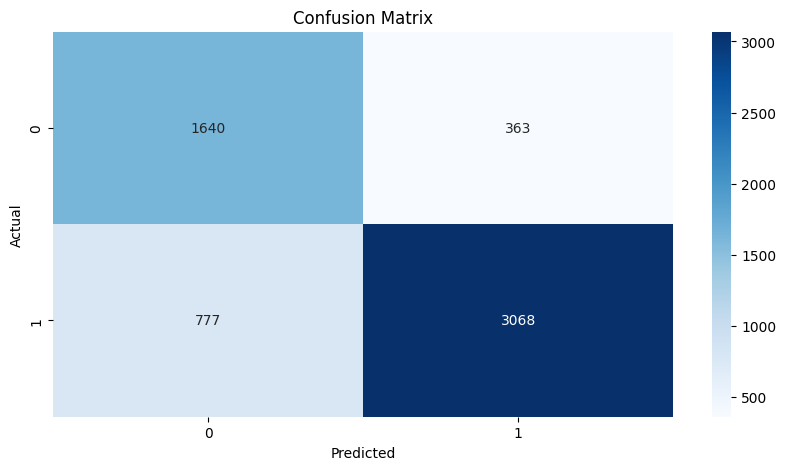

In [88]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [90]:
# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [2, 3]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(gb, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model on the training data
grid_search.fit(X_train_res, y_train_res)

# Get the best hyperparameters
best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [91]:
# Calculate the mean of the cross-validated scores
mean_score = grid_search.best_score_
print('Mean cross-validated score:', mean_score)

# Predict the target variable on the test data
y_pred = grid_search.predict(X_test)

Mean cross-validated score: 0.8118704112041236


In [92]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Auc_Roc_Curve after hyperparameter
auc_score = roc_auc_score(y_test,y_pred)
print('roc_auc_score:', auc_score)

# Print the classification report
report = classification_report(y_test, y_pred)
print(report)

# Creating Dataframe with actual and predicted values
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df.head(10)


Accuracy: 0.8050615595075239
roc_auc_score: 0.8083456090246944
              precision    recall  f1-score   support

           0       0.68      0.82      0.74      2003
           1       0.89      0.80      0.84      3845

    accuracy                           0.81      5848
   macro avg       0.79      0.81      0.79      5848
weighted avg       0.82      0.81      0.81      5848



,Actual,Predicted
13986,1,1
992,1,1
26336,1,1
1452,1,1
16405,1,0
9834,1,0
12430,0,0
12936,0,0
22295,1,1
5617,0,0


##### Which hyperparameter optimization technique have you used and why?

"I used GridSearchCV for hyperparameter tuning.

GridSearchCV is a powerful technique that systematically explores a predefined set of hyperparameter values. It exhaustively evaluates all possible combinations within the specified grid, allowing for a thorough search of the hyperparameter space.

This method is valuable because:

> Comprehensive Search: It ensures that no promising hyperparameter combinations are overlooked within the defined grid.

> Systematic Approach: It provides a structured and reproducible way to find the best hyperparameters.

> Cross-validation Integration: GridSearchCV often incorporates cross-validation to evaluate the model's performance on different subsets of the data, providing a more robust estimate of its performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Gradient boosting** is an approach to machine learning that combines the output of multiple weak learners in order to create a powerful predictive model. The algorithm works by fitting a new regression or classification model to the residual errors of the previous regression or classification model. This process is iterative, with each successive model improving on the last until a certain criteria is met. It is an efficient algorithm which results in a highly accurate predictive model. Gradient boosting can be used for both supervised and unsupervised learning problems, such as regression and classification. Here, we are using GBC for a classification problem and this bagging method is giving us quite good result are of **80.37** but before tuning of the parameter. After cross validation and hyper-parameter tuning, we got the total accuracy of **82.19%**


### ML Model - 5 XGBOOST CLASSIFIEER

In [93]:
# ML Model - 5 Implemantation of xgboost Algorithm
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# Create an XGBoost model
xgb_model = xgb.XGBClassifier()

# Fit the model on the training data
xgb_model.fit(X_train_res, y_train_res)

# Predict the target variable on the test data
y_pred = xgb_model.predict(X_test)

In [94]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Auc_Roc_Curve of the test
auc_score = roc_auc_score(y_test,y_pred)
print('Roc_Auc_Score', auc_score)

# Classification report of the model
report = classification_report(y_test, y_pred)
print(report)

# create a dataframe with actual and predicted values
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df.head(10)


Accuracy: 0.9117647058823529
Roc_Auc_Score 0.9019269535229016
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2003
           1       0.93      0.93      0.93      3845

    accuracy                           0.91      5848
   macro avg       0.90      0.90      0.90      5848
weighted avg       0.91      0.91      0.91      5848



,Actual,Predicted
13986,1,1
992,1,1
26336,1,1
1452,1,1
16405,1,1
9834,1,1
12430,0,0
12936,0,0
22295,1,1
5617,0,1


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

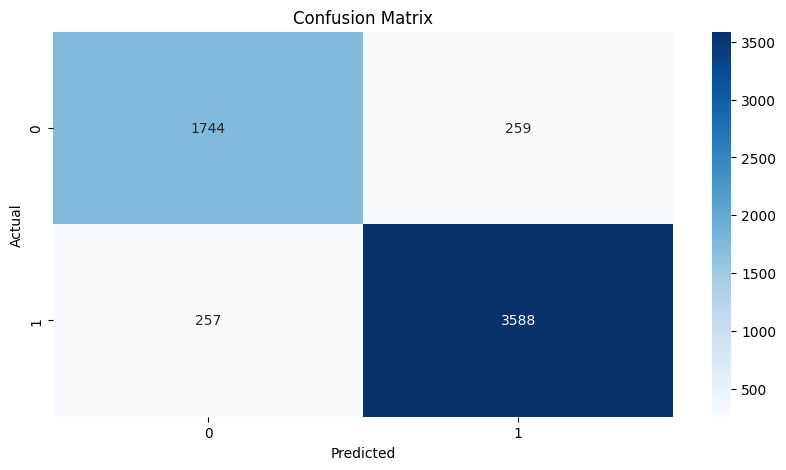

In [95]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [96]:
# ML Model - 5 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameters to tune
param_grid = {'n_estimators': [50, 100, 200],
			  'max_depth': [3, 5, 7]}
# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5)

# Fit the model on the training data
grid_search.fit(X_train_res, y_train_res)

# Get the best hyperparameters
best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)

# Predict the target variable on the test data
y_pred = grid_search.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Auc_Roc_Curve after hyperparameter
auc_score = roc_auc_score(y_test,y_pred)
print('roc_auc_score:', auc_score)

# Classification report of the model
report = classification_report(y_test, y_pred)
print(report)

# Creating Dataframe with actual and predicted values
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df.head(10)

Best hyperparameters: {'max_depth': 7, 'n_estimators': 200}
Accuracy: 0.9209986320109439
roc_auc_score: 0.9105036853042932
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      2003
           1       0.94      0.94      0.94      3845

    accuracy                           0.92      5848
   macro avg       0.91      0.91      0.91      5848
weighted avg       0.92      0.92      0.92      5848



,Actual,Predicted
13986,1,1
992,1,1
26336,1,1
1452,1,1
16405,1,1
9834,1,1
12430,0,0
12936,0,0
22295,1,1
5617,0,1


##### Which hyperparameter optimization technique have you used and why?

"I used GridSearchCV for hyperparameter tuning.

GridSearchCV is a powerful technique that systematically explores a predefined set of hyperparameter values. It exhaustively evaluates all possible combinations within the specified grid, allowing for a thorough search of the hyperparameter space.

This method is valuable because:

> Comprehensive Search: It ensures that no promising hyperparameter combinations are overlooked within the defined grid.

> Systematic Approach: It provides a structured and reproducible way to find the best hyperparameters.

> Cross-validation Integration: GridSearchCV often incorporates cross-validation to evaluate the model's performance on different subsets of the data, providing a more robust estimate of its performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***